In [1]:
!pip install sas7bdat
!pip install pandas
!pip install chardet
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn
!pip install statsmodels

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import chardet
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore")
import seaborn
from numpy import percentile
from numpy import unique

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

chemin_fichier_sas = 'base_finale_cible_1.sas7bdat'
try:
    df = pd.read_sas(chemin_fichier_sas, format='sas7bdat')
    print(df.head())
except Exception as e:
    print(f"Erreur lors de la lecture du fichier SAS : {e}")


       date cible_1  NUMTECPRS  Engagement_prorat   CODNAF2  \
0  202201.0    b'0'    17164.0            6689.74  b'8690D'   
1  202201.0    b'0'    35980.0           36711.62  b'8690E'   
2  202201.0    b'0'    43932.0            1127.50  b'4932Z'   
3  202201.0    b'0'    56910.0            1632.79  b'4781Z'   
4  202201.0    b'0'    60438.0              75.82  b'8690D'   

                  SEC_DER COULEUR_PART_M COULEUR_PART_MM3_M   AGE CODETAJUR  \
0     b'Pro lib sant\xe9'        b'Vert'       b'Vert_Vert'  58.0   b'1500'   
1     b'Pro lib sant\xe9'        b'Vert'       b'Vert_Vert'  60.0   b'1500'   
2              b'Artisan'        b'Vert'       b'Vert_Vert'  49.0   b'1300'   
3  b'Comm d\xe9tail alim'        b'Vert'       b'Vert_Vert'  52.0   b'1200'   
4     b'Pro lib sant\xe9'      b'Orange'   b'Orange_Orange'  38.0   b'1500'   

   ... Degra_couleur_IRPRO_mm1 INDDBLRLNPAR  INDRSKITDBDF  IRPRO_rouge_3dm  \
0  ...                   b' 0'         b'2'          b'0'           

In [4]:
# lES colonnes sont encodées en bytes. Décodage

def decode_bytes(val):
    if isinstance(val, bytes):  # Vérifie si la valeur est de type byte
        try:
            return val.decode('utf-8')  # Tente de décoder en 'utf-8'
        except UnicodeDecodeError:
            return val.decode('utf-8', errors='ignore')  # Ignore les erreurs de décodage
    return val

# Appliquer cette fonction à toutes les colonnes de type object
for col in df.select_dtypes(include=[object]):
    df[col] = df[col].map(decode_bytes)


In [5]:

# Supposons que df est un array NumPy
df = pd.DataFrame(df)
df.head(2)
df.dtypes


date                 float64
cible_1               object
NUMTECPRS            float64
Engagement_prorat    float64
CODNAF2               object
                      ...   
NDB_6dm               object
NDB_3dm               object
TOP_SCI               object
classe_finale_NDB     object
NBRMMSANCCLI         float64
Length: 185, dtype: object

In [6]:
print(df['date'].nunique())
df['date'] = pd.to_datetime(df['date'], format = '%Y%m')

#dt.strftime('%Y-%m')


12


In [7]:
df.dtypes

#np.unique(df['date'])

date                 datetime64[ns]
cible_1                      object
NUMTECPRS                   float64
Engagement_prorat           float64
CODNAF2                      object
                          ...      
NDB_6dm                      object
NDB_3dm                      object
TOP_SCI                      object
classe_finale_NDB            object
NBRMMSANCCLI                float64
Length: 185, dtype: object

# Evolution du Taux de variable cible

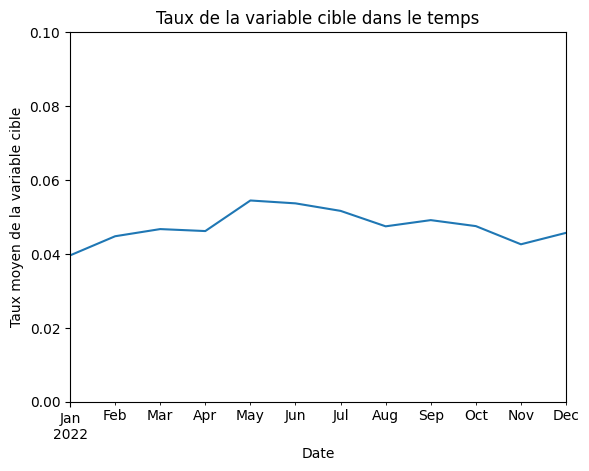

In [8]:
df['cible_1'] = df['cible_1'].astype(int)
taux_cible = df.groupby(df['date'].dt.to_period('M'))['cible_1'].mean() # ou sum()

# Tracer le taux de la variable cible au fil du temps
taux_cible.plot(title='Taux de la variable cible dans le temps')
plt.xlabel('Date')
plt.ylabel('Taux moyen de la variable cible')
plt.ylim(0,0.1)
plt.show()

In [9]:
 df_to_drop = ["cible_2","cible_3"]
 new_df = df.drop(columns=df_to_drop)

In [10]:
# Transformation de la variable cible en variables 


target_column = 'cible_1'
target = new_df[[target_column]].copy().astype("category")
target


,cible_1
0,0
1,0
2,0
3,0
4,0
...,...
596050,1
596051,1
596052,1
596053,1


In [11]:
target.value_counts()

cible_1
0          567790
1           28265
dtype: int64

In [12]:
#base_travail = new_df.drop([target_column], axis=1).copy()
base_travail = new_df.copy()
base_travail.head(2)

,date,cible_1,NUMTECPRS,Engagement_prorat,CODNAF2,SEC_DER,COULEUR_PART_M,COULEUR_PART_MM3_M,AGE,CODETAJUR,...,Degra_couleur_IRPRO_mm1,INDDBLRLNPAR,INDRSKITDBDF,IRPRO_rouge_3dm,NDB_12dm,NDB_6dm,NDB_3dm,TOP_SCI,classe_finale_NDB,NBRMMSANCCLI
0,2022-01-01,0,17164.0,6689.74,8690D,Pro lib sant,Vert,Vert_Vert,58.0,1500,...,0,2,0,0,0,0,0,0,4,451.0
1,2022-01-01,0,35980.0,36711.62,8690E,Pro lib sant,Vert,Vert_Vert,60.0,1500,...,0,2,0,0,0,0,0,0,1,468.0


In [13]:
base_travail.describe()

,cible_1,NUMTECPRS,Engagement_prorat,AGE,NBOPECAR,NBOPECARGLISS_M12,MNTOPECAR,NBPMTCAR,NBPMTCARGLISS_M12,MNTPMTCAR,...,MNTECRDBT_rel_mm12,NBPLV_abs_mm12,MNTPLV_abs_mm12,MNTPLV_rel_mm12,MNTTOTMVTAFF_abs_mm12,MNTTOTMVTAFF_rel_mm12,NB_SALARIES_abs_mm12,CATTCEUR_abs_mm12,EVOL_NB_SALARIE,NBRMMSANCCLI
count,596055.000000,5.960550e+05,5.960550e+05,176362.000000,596042.000000,596042.000000,596042.000000,596042.000000,596042.000000,596042.000000,...,527003.000000,539998.000000,5.399980e+05,462609.000000,5.399980e+05,4.650860e+05,460228.000000,404477.000000,460228.000000,596000.000000
mean,0.047420,6.657878e+10,8.857375e+04,49.478845,12.737780,147.844815,1323.022782,12.303423,142.622399,1260.725535,...,17.086667,0.940618,-1.208382e+03,9.514179,2.255714e+03,7.603675e+01,0.241632,-12.461831,0.241632,145.162705
std,0.212536,3.899386e+10,3.195101e+05,12.331494,20.798193,218.133552,2736.134063,20.197252,211.653229,2661.824761,...,960.194835,5.553490,1.467715e+04,621.065314,3.578929e+05,1.174079e+04,10.413646,2406.758717,10.413646,138.796024
min,0.000000,9.100000e+02,1.736364e-01,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.999996,-881.000000,-1.596642e+06,-0.999998,-2.482887e+08,-1.516897e+02,-1912.000000,-740952.000000,-1912.000000,0.000000
25%,0.000000,3.090370e+10,3.039770e+03,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.260173,-1.000000,-1.289785e+03,-0.110536,-3.360000e+03,-2.759760e-01,0.000000,0.000000,0.000000,40.000000
50%,0.000000,6.430684e+10,2.052365e+04,50.000000,5.000000,76.000000,360.725000,5.000000,73.000000,331.995000,...,0.020260,0.000000,-6.641000e+01,0.115977,0.000000e+00,1.499163e-02,0.000000,0.000000,0.000000,98.000000
75%,0.000000,9.925173e+10,7.269348e+04,59.000000,17.000000,206.000000,1568.927500,17.000000,199.000000,1474.900000,...,0.478994,2.000000,1.212075e+02,0.686319,5.128438e+03,4.864432e-01,0.000000,0.000000,0.000000,206.000000
max,1.000000,1.343995e+11,4.007516e+07,98.000000,844.000000,9034.000000,160732.980000,832.000000,9029.000000,160732.980000,...,327069.285366,231.000000,2.844443e+06,290358.133333,4.008643e+07,5.784573e+06,3003.000000,860657.000000,3003.000000,875.000000


In [14]:
# def find_columns_with_few_unique_values(df, max_unique_values=20):
#     """
#     Identifie les colonnes dans le DataFrame ayant moins de 'max_unique_values' valeurs distinctes
#     et dont les noms ne commencent pas par 'NB' ni 'CATTCEUR'.

#     :param df: DataFrame Pandas.
#     :param max_unique_values: Le nombre maximum de valeurs distinctes autorisées.
#     :return: Liste des colonnes correspondantes.
#     """
#     return [col for col in df.columns if df[col].nunique() < max_unique_values and not col.startswith('NB') and not col.startswith('CATTCEUR')]

# # CATTCEUR : chiffre d'affaires, toutes les variables commençant par NB sont catégorielles.

In [15]:
# def find_non_numerical_variable(df):
#     """
#     Identifie les colonnes non nuémriques dans un dataframe.
#     :param df: Dataframe pandas
#     """
#     return [col for col in df.columns if df[col].dtypes != float]

In [16]:
categorical_columns=[col for col in base_travail.columns if col.startswith('CHR_USAGE') or col.startswith('CODACVPRO') or col.startswith('CODETAJUR') or col.startswith('CODNAF2') or 
                     col.startswith('CODTYPPRS') or col.startswith('COULEUR_IRPRO') or col.startswith('COULEUR_PART_M') or col.startswith('Degra_IRPRO') or col.startswith('Degra_couleur') or 
                     col.startswith('INDDBLRLNPAR') or col.startswith('INDRSKITDBDF') or col.startswith('IRPRO_rouge_3dm') or col.startswith('NDB') or 
                     col.startswith('SEC_DER') or col.startswith('TOP_SCI') or col.startswith('Type_fdc_dm') or col.startswith('classe_finale_NDB')]

#categorical_columns = find_non_numerical_variable(base_travail)
numerical_columns = base_travail.drop(columns= categorical_columns+['cible_1','date','NBJ_ARR', 'LIBCSPCMP']).columns

len(numerical_columns)

numerical_columns

Index(['NUMTECPRS', 'Engagement_prorat', 'AGE', 'NBOPECAR',
       'NBOPECARGLISS_M12', 'MNTOPECAR', 'NBPMTCAR', 'NBPMTCARGLISS_M12',
       'MNTPMTCAR', 'NBRETCAR',
       ...
       'MNTECRDBT_rel_mm12', 'NBPLV_abs_mm12', 'MNTPLV_abs_mm12',
       'MNTPLV_rel_mm12', 'MNTTOTMVTAFF_abs_mm12', 'MNTTOTMVTAFF_rel_mm12',
       'NB_SALARIES_abs_mm12', 'CATTCEUR_abs_mm12', 'EVOL_NB_SALARIE',
       'NBRMMSANCCLI'],
      dtype='object', length=150)

# Echatillonnage train-test


In [20]:
X = base_travail.drop(columns = ['cible_1'])

X['stratify_col'] = base_travail['cible_1'].astype(str) + '_' + base_travail['date'].astype(str)


# Split train-test stratifié en utilisant la colonne combinée
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Les features incluant la date si elle est utilisée comme feature
    target,                 # La variable cible
    stratify=X['stratify_col'],  # La nouvelle colonne pour la stratification
    test_size=0.3,                # La proportion de l'ensemble de test
    random_state=42               # La graine pour la reproductibilité
)

# Vous pouvez ensuite supprimer la colonne 'stratify_col' si elle n'est pas nécessaire pour l'entraînement
X_train = X_train.drop(['stratify_col'], axis=1)
X_test = X_test.drop(['stratify_col'], axis=1)


In [21]:
base_travail = X_train
base_travail['cible_1'] = y_train
base_travail

,date,NUMTECPRS,Engagement_prorat,CODNAF2,SEC_DER,COULEUR_PART_M,COULEUR_PART_MM3_M,AGE,CODETAJUR,CODTYPPRS,...,INDDBLRLNPAR,INDRSKITDBDF,IRPRO_rouge_3dm,NDB_12dm,NDB_6dm,NDB_3dm,TOP_SCI,classe_finale_NDB,NBRMMSANCCLI,cible_1
527714,2022-11-01,8.400287e+10,22138.04,8121Z,Comm dtail non alim,Vert,Vert_Vert,61.0,1300,EI,...,2,0,0,0,0,0,0,6,353.0,0
324008,2022-07-01,4.992791e+10,103262.02,4690Z,Comm Gros non alim,NC,NC_NC,NaN,5499,PM,...,1,0,0,0,0,0,0,5,148.0,0
464966,2022-10-01,4.200002e+10,151.98,8621Z,Pro lib sant,Vert,Vert_Vert,45.0,1500,EI,...,2,0,0,0,0,0,0,6,369.0,0
136481,2022-03-01,9.252799e+10,31713.86,5610A,CHR,NC,NC_NC,NaN,5499,PM,...,1,0,0,0,0,0,0,5,87.0,0
113310,2022-03-01,2.814150e+10,145069.18,6420Z,transport,NC,NC_NC,NaN,5710,PM,...,1,0,0,0,0,0,0,5,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370799,2022-08-01,4.352494e+10,89082.12,6820B,S C I,NC,NC_NC,NaN,6540,PM,...,2,0,0,0,0,0,1,5,47.0,0
3560,2022-01-01,1.400468e+10,45553.37,6420Z,transport,NC,NC_NC,NaN,5499,PM,...,2,0,0,0,0,0,0,1,672.0,0
451641,2022-10-01,6.936990e+08,38600.85,5610A,CHR,NC,NC_NC,NaN,5499,PM,...,1,0,0,0,0,0,0,3,21.0,0
241106,2022-05-01,1.058165e+11,3379.29,8690E,Pro lib sant,Vert,Vert_Vert,67.0,1500,EI,...,2,0,0,0,0,0,0,3,107.0,0


# Imputation des valeurs manquantes des colonnes numériques 

In [22]:
from sklearn.impute import SimpleImputer

# Création d'un imputer qui remplace les valeurs manquantes par la médiane de la colonne
# Ceci dependait du taux de risque
imputer = SimpleImputer(strategy='median')


base_travail[numerical_columns] = imputer.fit_transform(base_travail[numerical_columns])


In [23]:
len(categorical_columns)
categorical_columns


['CODNAF2',
 'SEC_DER',
 'COULEUR_PART_M',
 'COULEUR_PART_MM3_M',
 'CODETAJUR',
 'CODTYPPRS',
 'Type_fdc_dm',
 'Degra_IRPRO_mm6',
 'CHR_USAGE_NDB_V1_4',
 'CHR_USAGE_mm1',
 'CHR_USAGE_mm3',
 'CHR_USAGE_mm6',
 'CODACVPRO',
 'COULEUR_IRPRO',
 'COULEUR_IRPRO_mm1',
 'Degra_IRPRO_1pt_par_2m',
 'Degra_IRPRO_2pt_par_2m',
 'Degra_IRPRO_continue_3dm',
 'Degra_IRPRO_mm1',
 'Degra_IRPRO_mm3',
 'Degra_couleur_IRPRO_mm1',
 'INDDBLRLNPAR',
 'INDRSKITDBDF',
 'IRPRO_rouge_3dm',
 'NDB_12dm',
 'NDB_6dm',
 'NDB_3dm',
 'TOP_SCI',
 'classe_finale_NDB']

In [24]:
# Convertion des colonnes en category


for col in categorical_columns:
    base_travail[col] = base_travail[col].astype('category')
    print( base_travail[col].dtypes)

category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category
category


In [25]:
base_travail.describe()

,NUMTECPRS,Engagement_prorat,AGE,NBOPECAR,NBOPECARGLISS_M12,MNTOPECAR,NBPMTCAR,NBPMTCARGLISS_M12,MNTPMTCAR,NBRETCAR,...,MNTECRDBT_rel_mm12,NBPLV_abs_mm12,MNTPLV_abs_mm12,MNTPLV_rel_mm12,MNTTOTMVTAFF_abs_mm12,MNTTOTMVTAFF_rel_mm12,NB_SALARIES_abs_mm12,CATTCEUR_abs_mm12,EVOL_NB_SALARIE,NBRMMSANCCLI
count,4.172380e+05,4.172380e+05,417238.000000,417238.000000,417238.000000,417238.000000,417238.000000,417238.000000,417238.000000,417238.000000,...,417238.000000,417238.000000,4.172380e+05,417238.000000,4.172380e+05,4.172380e+05,417238.000000,417238.000000,417238.000000,417238.000000
mean,6.657215e+10,8.828549e+04,49.844640,12.723903,147.597295,1322.522097,12.289130,142.382808,1260.104743,0.329843,...,15.398514,0.850589,-1.110954e+03,7.908928,2.066443e+03,4.004353e+01,0.185721,-10.280849,0.185721,145.169445
std,3.899443e+10,3.193455e+05,6.717277,20.720898,216.774480,2744.399745,20.121102,210.277903,2670.991067,1.358847,...,908.137720,5.285212,1.388503e+04,639.334207,3.967826e+05,4.821527e+03,9.088657,1808.822637,9.088657,138.842329
min,9.100000e+02,1.736364e-01,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.999996,-879.000000,-1.596642e+06,-0.999998,-2.482887e+08,-1.203245e+02,-1912.000000,-740952.000000,-1912.000000,0.000000
25%,3.091303e+10,3.035210e+03,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.209107,0.000000,-1.058997e+03,-0.020838,-2.562795e+03,-1.664659e-01,0.000000,0.000000,0.000000,40.000000
50%,6.430664e+10,2.052731e+04,50.000000,5.000000,76.000000,359.970000,5.000000,73.000000,331.200000,0.000000,...,0.019695,0.000000,-6.736000e+01,0.117025,0.000000e+00,1.503781e-02,0.000000,0.000000,0.000000,98.000000
75%,9.922971e+10,7.238768e+04,50.000000,17.000000,205.000000,1567.412500,17.000000,198.000000,1473.222500,0.000000,...,0.382677,2.000000,5.196750e+01,0.436767,4.069660e+03,2.909729e-01,0.000000,0.000000,0.000000,206.000000
max,1.343995e+11,4.007506e+07,98.000000,844.000000,9034.000000,160732.980000,832.000000,9029.000000,160732.980000,70.000000,...,327069.285366,231.000000,2.844443e+06,290358.133333,4.008643e+07,2.202849e+06,1866.000000,253731.000000,1866.000000,875.000000


In [26]:

import pandas as pd
from scipy.stats import chi2_contingency

def chi_squared_test(df, target_variable, categorical_variables):
    results = []

    for cat_var in categorical_variables:
        # Création d'un tableau de contingence
        contingency_table = pd.crosstab(target_variable, df[cat_var])

        # Test du khi-deux
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        # Calcul du T de Tschuprow
        # Calcul de T de Tschuprow
        N = np.sum(contingency_table.values)  # Taille totale de l'échantillon
        r, c = contingency_table.shape       # Nombre de lignes et de colonnes
        T = np.sqrt(chi2 / N / np.sqrt((r - 1) * (c - 1)))
        V = np.sqrt(chi2 / N / min((r - 1), (c - 1)))

        # Enregistrer les résultats
        results.append({'Variable': cat_var, 'Chi2': chi2, 'p-value': p, 'Tschuprow T': T, 'V de Cramer': V})

    return pd.DataFrame(results)



In [27]:
chi_squared_test(base_travail,target[target_column],categorical_columns).sort_values(by ='Chi2',ascending = False).round(3)

,Variable,Chi2,p-value,Tschuprow T,V de Cramer
28,classe_finale_NDB,54685.762,0.0,0.181,0.362
8,CHR_USAGE_NDB_V1_4,53787.923,0.0,0.207,0.359
9,CHR_USAGE_mm1,43069.728,0.0,0.173,0.321
13,COULEUR_IRPRO,39989.458,0.0,0.260,0.310
14,COULEUR_IRPRO_mm1,34267.063,0.0,0.218,0.287
10,CHR_USAGE_mm3,30482.445,0.0,0.145,0.270
11,CHR_USAGE_mm6,25343.021,0.0,0.132,0.246
23,IRPRO_rouge_3dm,24947.989,0.0,0.245,0.245
19,Degra_IRPRO_mm3,10600.658,0.0,0.078,0.159
7,Degra_IRPRO_mm6,9847.335,0.0,0.079,0.159


Text(0.5, 1.0, 'Variables catégorielles dépendantes de la variable cible')

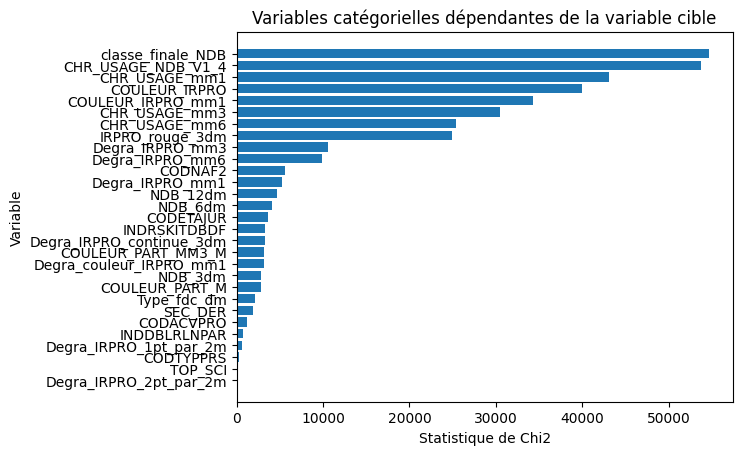

In [28]:
base_test_chi2= chi_squared_test(base_travail,target[target_column],categorical_columns).sort_values(by ='Chi2',ascending = True).round(3)
plt.barh(base_test_chi2['Variable'], base_test_chi2['Chi2'])

# Ajoutez des étiquettes et un titre
plt.xlabel('Statistique de Chi2')
plt.ylabel('Variable')
plt.title('Variables catégorielles dépendantes de la variable cible')

In [29]:
import pandas as pd
from scipy.stats import kruskal

#L'hypothèse nulle (H0) du test de Kruskal-Wallis est que les médianes de tous les groupes sont égales
# Il y'aura liaison entre la variable continue et la variable catégorielle avec X% de chance de 
# se tromper si on rejette l'hypothèse nulle du test.

def kruskal_wallis_test(df, target_column, target,numerical_columns):
    """
        Cette fonction permet de réaliser le test de Kruskal Wallis c'est dire comparer la distribution de un ou plusieurs 
        groupes indépendantes.

        params:
            - df : base de variables indépendantes 
            - target_column : nom de ma variable cible
            - target : variable cible
            - numerical_columns: ensemble de mes variables numériques.
    """
    results = [] # "liste de dictionnaires qui stockera mes résultats"
    df[target_column] = target 
    for num_var in numerical_columns:
        # Préparation des groupes
        groups = [group.dropna().values for name, group in df.groupby(target_column)[num_var]]

        # Effectuer le test de Kruskal-Wallis
        H, p_value = kruskal(*groups)

        # Enregistrer les résultats
        results.append({'Variable': num_var, 'H-statistic': H, 'p-value': p_value})

    # Convertir en DataFrame pour un affichage et une manipulation plus aisés
    results_df = pd.DataFrame(results)
    return results_df




Kw_test = kruskal_wallis_test(base_travail, target_column, target,numerical_columns)
print(Kw_test)



                  Variable  H-statistic        p-value
0                NUMTECPRS     1.989063   1.584389e-01
1        Engagement_prorat  7450.828755   0.000000e+00
2                      AGE   105.251394   1.075830e-24
3                 NBOPECAR  4449.239770   0.000000e+00
4        NBOPECARGLISS_M12  1770.749359   0.000000e+00
..                     ...          ...            ...
145  MNTTOTMVTAFF_rel_mm12   678.306758  1.560084e-149
146   NB_SALARIES_abs_mm12    55.802025   8.014894e-14
147      CATTCEUR_abs_mm12     0.181140   6.703955e-01
148        EVOL_NB_SALARIE    55.802025   8.014894e-14
149           NBRMMSANCCLI  3084.278398   0.000000e+00

[150 rows x 3 columns]


In [30]:
Kw_test.sort_values(by = "p-value", ascending=False).round(3)

,Variable,H-statistic,p-value
147,CATTCEUR_abs_mm12,0.181,0.670
127,CRTOC_IND_0301_abs_mm3,1.983,0.159
0,NUMTECPRS,1.989,0.158
69,NB_RESTRU,4.002,0.045
81,CRTOD_CMT_IND_0036,5.507,0.019
...,...,...,...
64,DEPASSEMENT_12dm,26502.046,0.000
63,DEPASSEMENT_6dm,28671.327,0.000
62,DEPASSEMENT_3dm,28211.388,0.000
61,IMPAYE_12dm,5682.012,0.000


Text(0.5, 1.0, 'Variables numériques dépendantes de la variable cible')

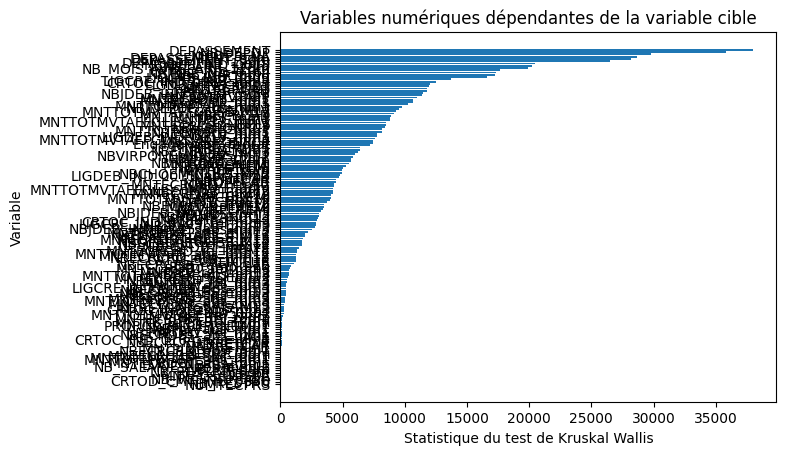

In [31]:
base_test_kw= Kw_test.sort_values(by = 'H-statistic', ascending=True).round(3)
plt.barh(base_test_kw['Variable'][2:], base_test_kw['H-statistic'][2:])

# Ajoutez des étiquettes et un titre
plt.xlabel('Statistique du test de Kruskal Wallis')
plt.ylabel('Variable')
plt.title('Variables numériques dépendantes de la variable cible')

In [32]:
"""
# vARIABLE numériques AVEC FAIBLE VARIANCE

from sklearn.feature_selection import VarianceThreshold


transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(base_travail[numerical_columns])
print(X_sel.shape)
"""

'\n# vARIABLE numériques AVEC FAIBLE VARIANCE\n\nfrom sklearn.feature_selection import VarianceThreshold\n\n\ntransform = VarianceThreshold()\n# transform the input data\nX_sel = transform.fit_transform(base_travail[numerical_columns])\nprint(X_sel.shape)\n'

In [33]:
"""
# apply transform with each threshold
thresholds = np.arange(0.0, 0.55, 0.05)

results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(base_travail[numerical_columns])
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
"""

"\n# apply transform with each threshold\nthresholds = np.arange(0.0, 0.55, 0.05)\n\nresults = list()\nfor t in thresholds:\n    # define the transform\n    transform = VarianceThreshold(threshold=t)\n    # transform the input data\n    X_sel = transform.fit_transform(base_travail[numerical_columns])\n    # determine the number of input features\n    n_features = X_sel.shape[1]\n    print('>Threshold=%.2f, Features=%d' % (t, n_features))\n    # store the result\n    results.append(n_features)\n"

In [34]:
"""
varia_num_del=['NBOPECAR', 'NBOPECARGLISS_M12', 'MNTOPECAR', 'NBECRCRD_mm1',
       'NBECRCRD_mm3', 'NBECRDBT_mm1', 'NBECRDBT_mm3', 'NBCHQEMI',
       'NBPLV_mm1', 'NBPLV_mm3', 'MNTPLV_mm1', 'MNTPLV_mm3',
       'MNTPLV_mm12', 'MNTTOTMVTAFFGLISS_M12_mm1',
       'MNTTOTMVTAFFGLISS_M12_mm3', 'MNTTOTMVTAFF_mm1',
       'MNTTOTMVTAFF_abs_mm1', 'MNTECRCRD_mm3', 'MNTTOTMVTAFF_mm12',
       'MNTTOTMVTAFF_abs_mm12', 'NBJDEPDP_mm3', 'CATTCEUR_mm12',
       'LIGDEB_IND_0015', 'LIGDEB_IND_0015_mm3', 'LIGCRE_IND_0009_mm3',
       'MNTECRDBT_abs_mm1', 'MNTECRDBT_abs_mm3', 'EVOL_NB_SALARIE',
       'NBPMTCARGLISS_M12', 'NBVIRPONRCP', 'NBECRCRD_mm12',
       'MNTECRCRD_abs_mm3', 'NBECRDBT_mm12', 'MNTECRDBT_abs_mm12',
       'NBCHQEMIGLISS_M12', 'NBPLV_mm12', 'MNTECRDBT_mm3',
       'MNTECRDBT_mm12', 'MNTTOTMVTAFFGLISS_M12_mm12', 'DEPASSEMENT_12dm',
       'CRTOC_IND_0301', 'CRTOC_IND_0301_mm3', 'NB_SALARIES_mm12',
       'CRTOC_IND_0164_abs_mm3']
numerical_columns  = [col for col in numerical_columns if col not in varia_num_del]
len(numerical_columns)
"""

"\nvaria_num_del=['NBOPECAR', 'NBOPECARGLISS_M12', 'MNTOPECAR', 'NBECRCRD_mm1',\n       'NBECRCRD_mm3', 'NBECRDBT_mm1', 'NBECRDBT_mm3', 'NBCHQEMI',\n       'NBPLV_mm1', 'NBPLV_mm3', 'MNTPLV_mm1', 'MNTPLV_mm3',\n       'MNTPLV_mm12', 'MNTTOTMVTAFFGLISS_M12_mm1',\n       'MNTTOTMVTAFFGLISS_M12_mm3', 'MNTTOTMVTAFF_mm1',\n       'MNTTOTMVTAFF_abs_mm1', 'MNTECRCRD_mm3', 'MNTTOTMVTAFF_mm12',\n       'MNTTOTMVTAFF_abs_mm12', 'NBJDEPDP_mm3', 'CATTCEUR_mm12',\n       'LIGDEB_IND_0015', 'LIGDEB_IND_0015_mm3', 'LIGCRE_IND_0009_mm3',\n       'MNTECRDBT_abs_mm1', 'MNTECRDBT_abs_mm3', 'EVOL_NB_SALARIE',\n       'NBPMTCARGLISS_M12', 'NBVIRPONRCP', 'NBECRCRD_mm12',\n       'MNTECRCRD_abs_mm3', 'NBECRDBT_mm12', 'MNTECRDBT_abs_mm12',\n       'NBCHQEMIGLISS_M12', 'NBPLV_mm12', 'MNTECRDBT_mm3',\n       'MNTECRDBT_mm12', 'MNTTOTMVTAFFGLISS_M12_mm12', 'DEPASSEMENT_12dm',\n       'CRTOC_IND_0301', 'CRTOC_IND_0301_mm3', 'NB_SALARIES_mm12',\n       'CRTOC_IND_0164_abs_mm3']\nnumerical_columns  = [col for col i

In [35]:

def outlier(data):
    results = []
    variables_non_numerique = [] 
    for col in data.columns:
        try:
            q25, q75 = percentile(data[col], 25), percentile(data[col], 75)
            # define outliers
            iqr = q75 - q25
            # calculate the outlier cutoff
            cut_off = iqr * 1.5
            lower, upper = q25 - cut_off, q75 + cut_off
            # identify outliers
            outliers = [x for x in data[col] if x < lower or x > upper]
        except TypeError:
            variables_non_numerique.append(col)
            
        if len(outliers)>0:
            results.append(col)
    print(variables_non_numerique)
    return results

In [36]:
(outlier(base_travail[numerical_columns]))

[]


['Engagement_prorat',
 'AGE',
 'NBOPECAR',
 'NBOPECARGLISS_M12',
 'MNTOPECAR',
 'NBPMTCAR',
 'NBPMTCARGLISS_M12',
 'MNTPMTCAR',
 'NBRETCAR',
 'NBRETCARGLISS_M12',
 'MNTRETCAR',
 'NBECRCRD',
 'MNTECRCRD',
 'NBECRDBT',
 'MNTECRDBT',
 'NBVIRPONEMI',
 'NBVIRPONEMIGLISS_M12',
 'MNTVIRPONEMI',
 'NBCHQEMI',
 'NBCHQEMIGLISS_M12',
 'MNTCHQEMI',
 'NBPLV',
 'MNTPLV',
 'NBVIRPONRCP',
 'MNTVIRPONRCP',
 'NBVIRPEREMI',
 'MNTVIRPEREMI',
 'MNTTOTMVTAFF',
 'MNTTOTMVTAFFGLISS_M12',
 'MNTECSCPTEPA',
 'NBECRCRD_mm1',
 'MNTECRCRD_mm1',
 'NBECRDBT_mm1',
 'MNTECRDBT_mm1',
 'NBPLV_mm1',
 'MNTPLV_mm1',
 'MNTTOTMVTAFF_mm1',
 'MNTTOTMVTAFFGLISS_M12_mm1',
 'NBECRCRD_mm3',
 'MNTECRCRD_mm3',
 'NBECRDBT_mm3',
 'MNTECRDBT_mm3',
 'NBPLV_mm3',
 'MNTPLV_mm3',
 'MNTTOTMVTAFF_mm3',
 'MNTTOTMVTAFFGLISS_M12_mm3',
 'NBECRCRD_mm12',
 'MNTECRCRD_mm12',
 'NBECRDBT_mm12',
 'MNTECRDBT_mm12',
 'NBPLV_mm12',
 'MNTPLV_mm12',
 'MNTTOTMVTAFF_mm12',
 'MNTTOTMVTAFFGLISS_M12_mm12',
 'IMPAYE',
 'DEPASSEMENT',
 'NBJ_ARR_mm1',
 'NBJ_ARR_mm12

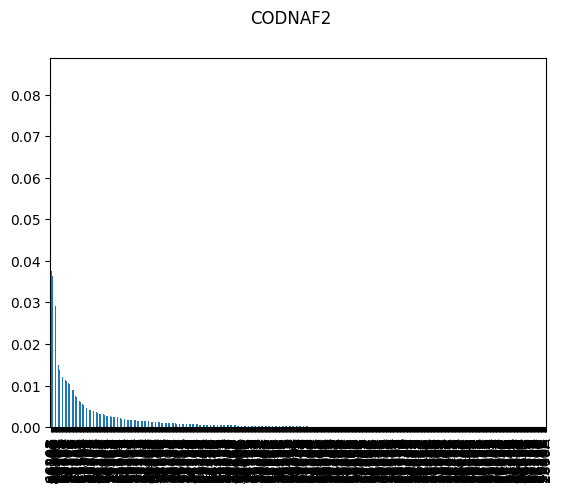

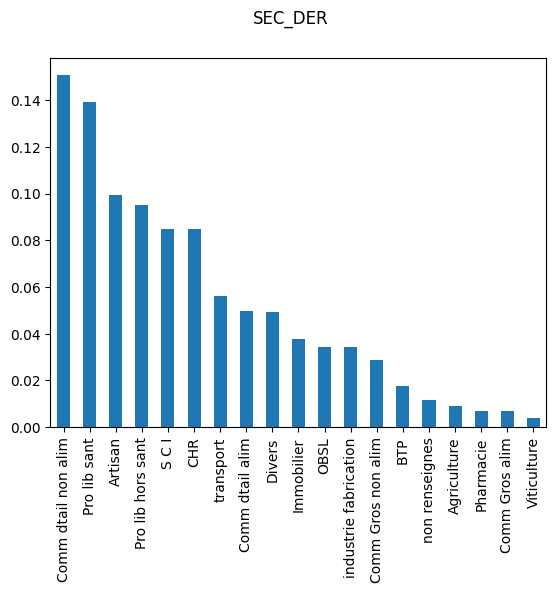

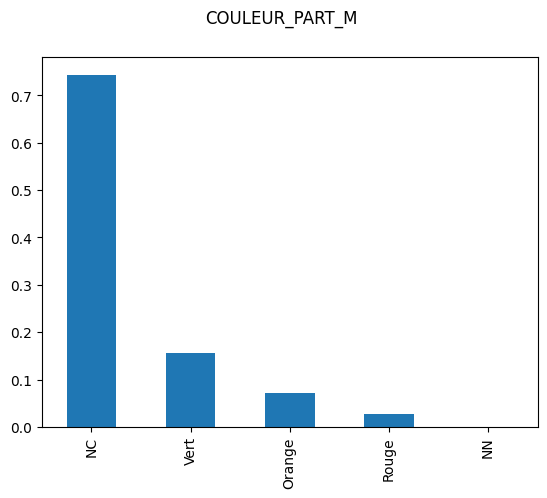

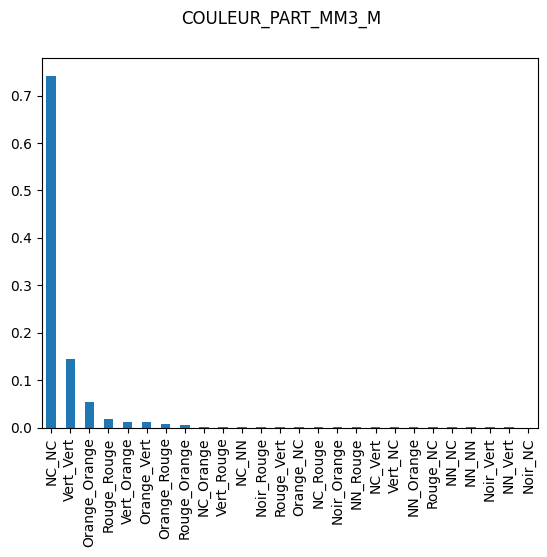

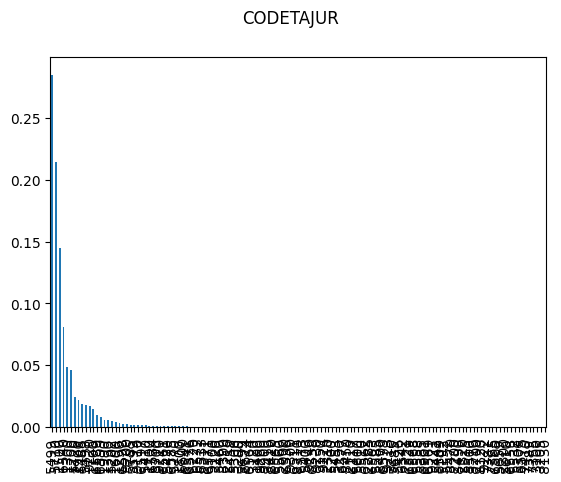

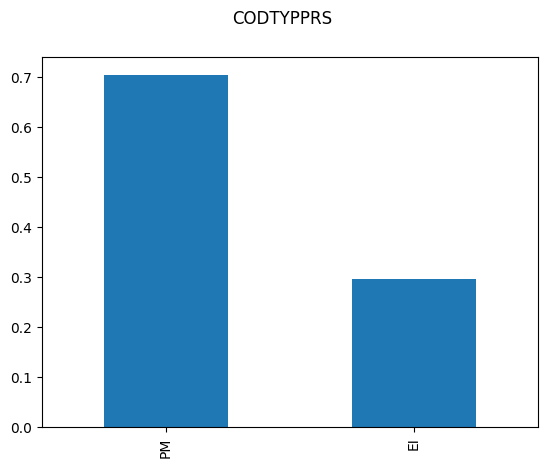

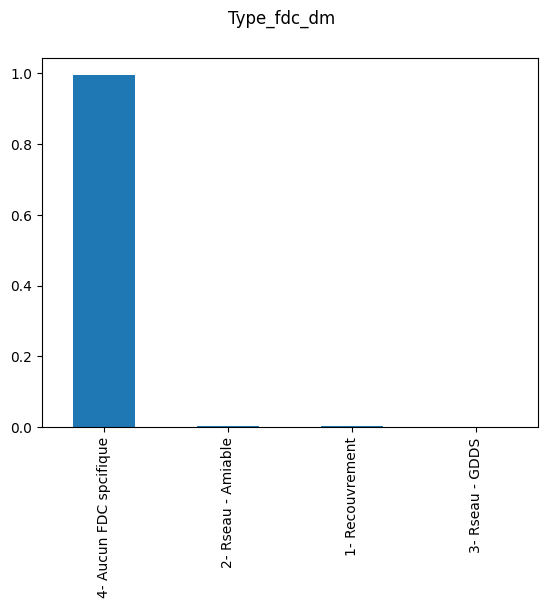

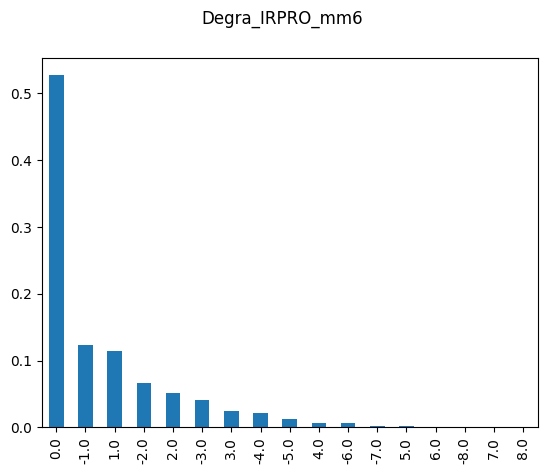

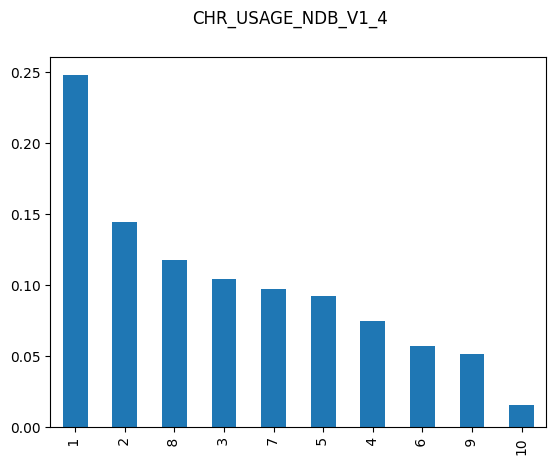

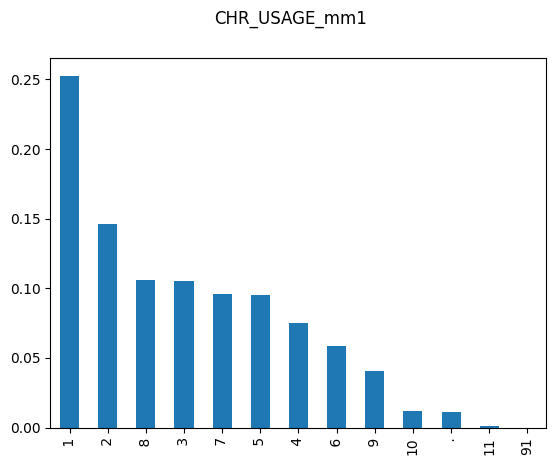

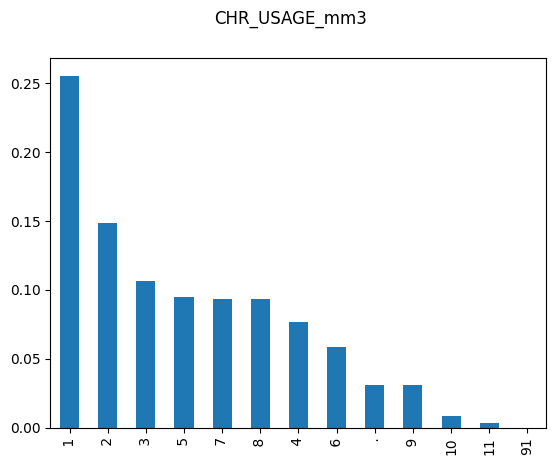

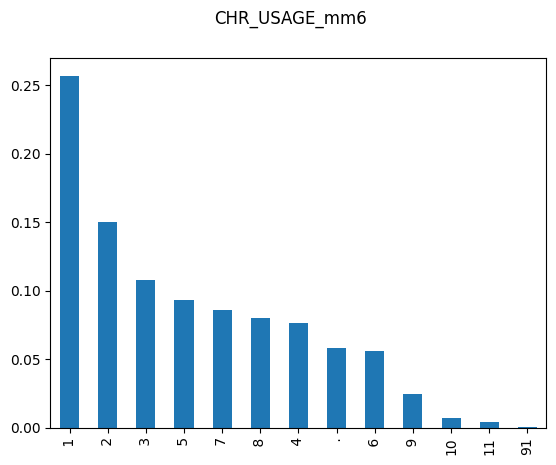

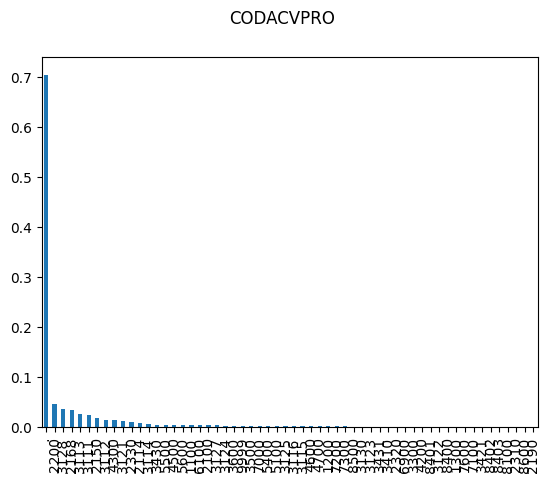

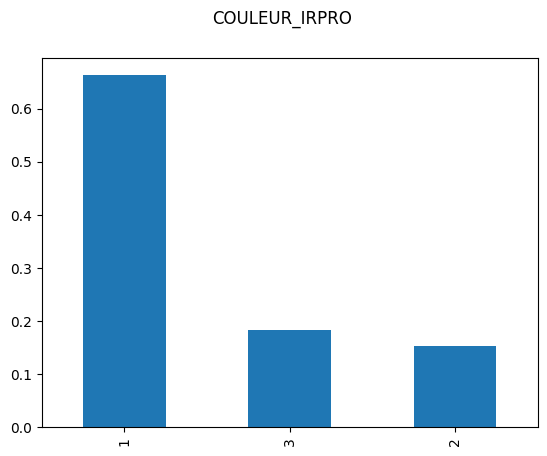

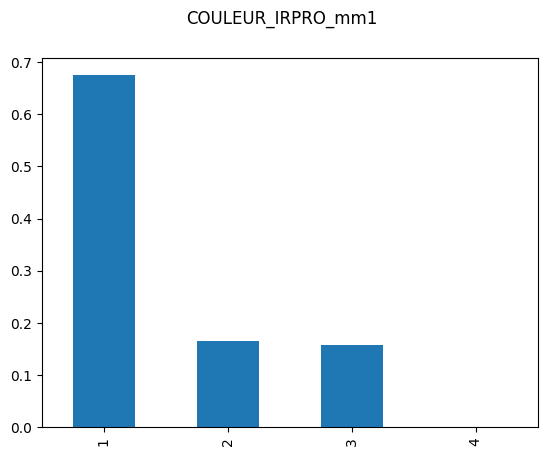

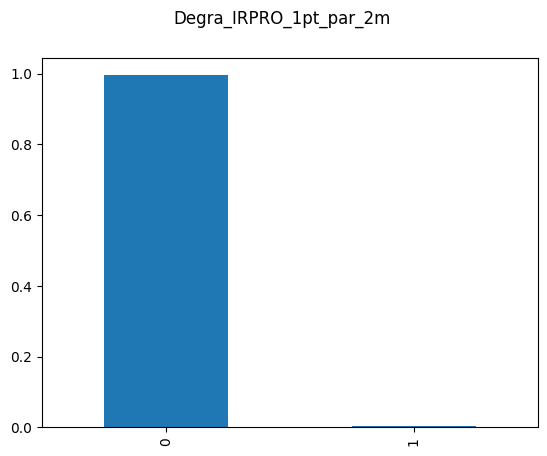

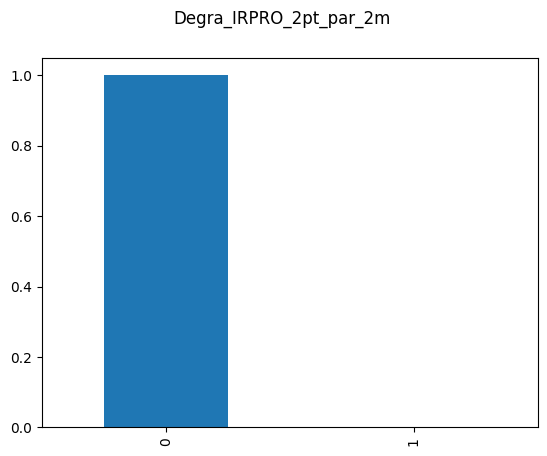

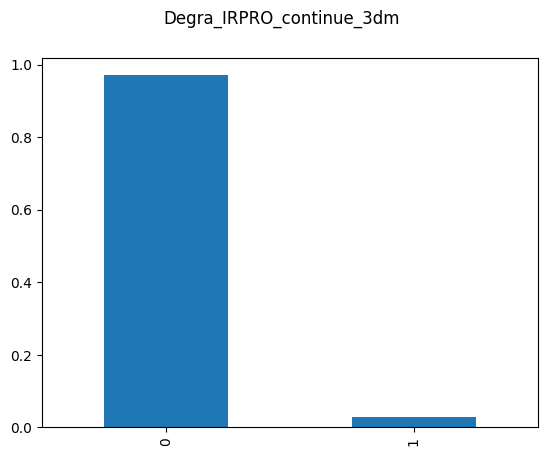

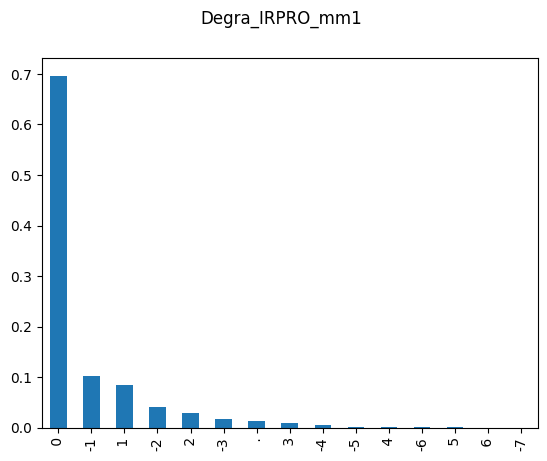

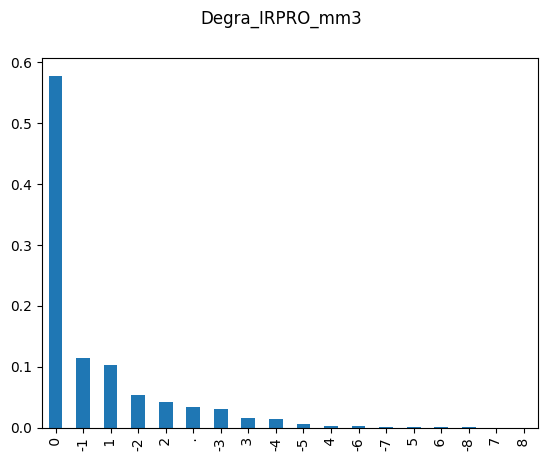

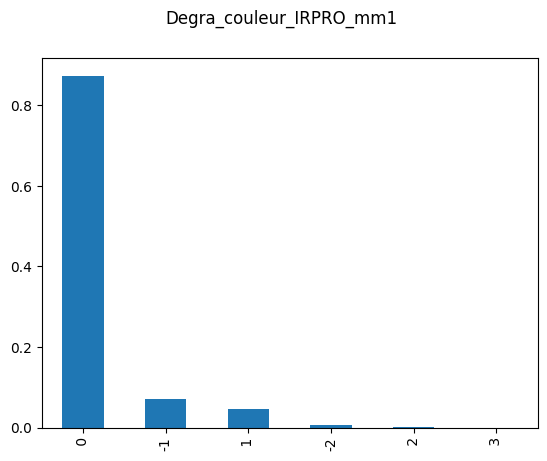

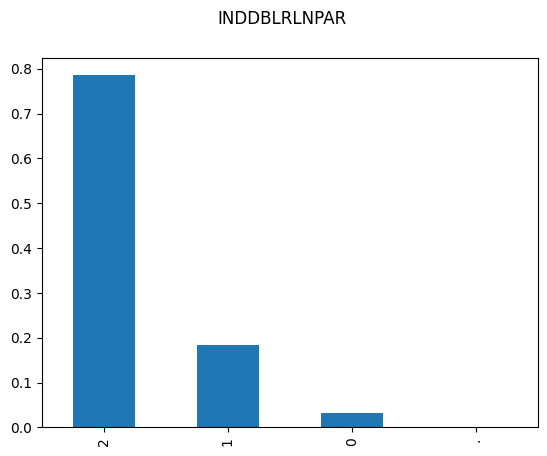

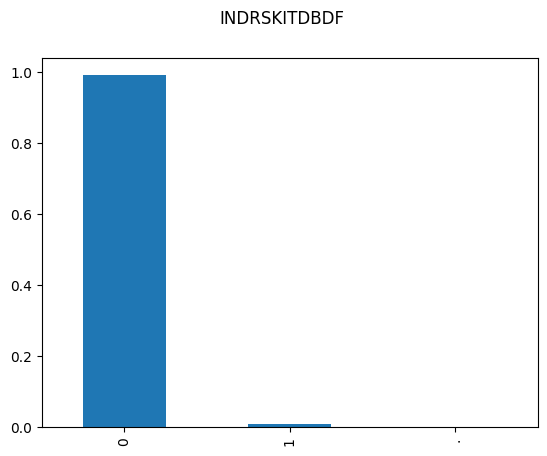

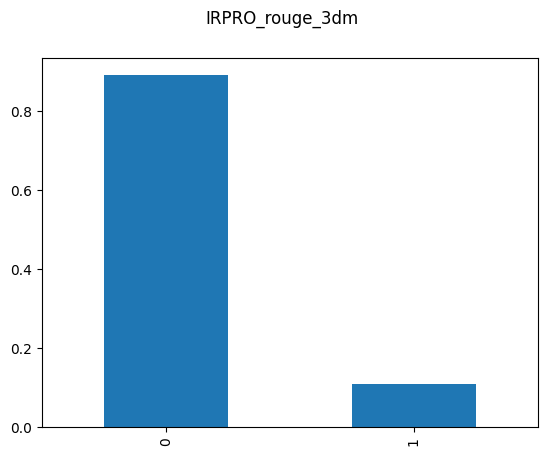

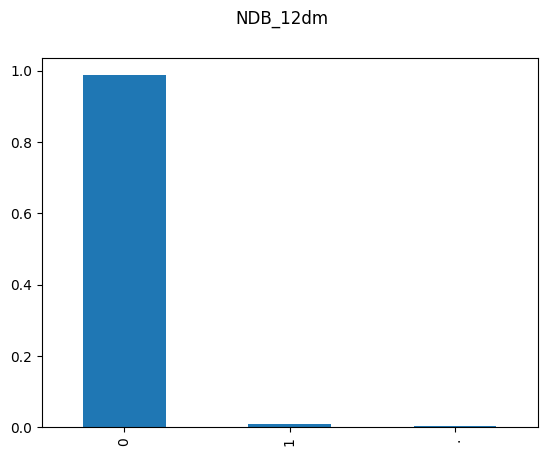

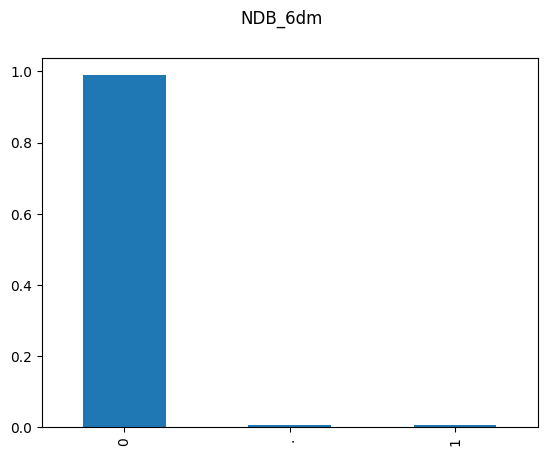

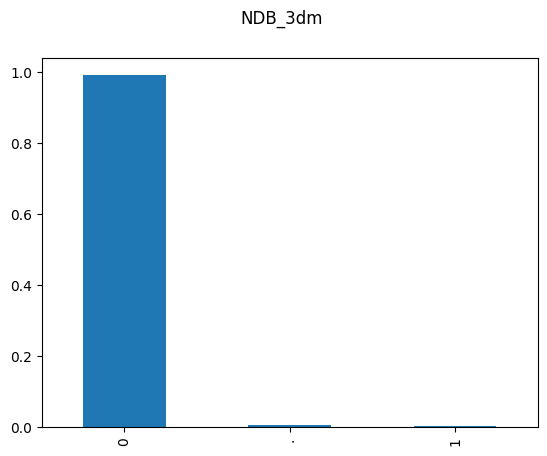

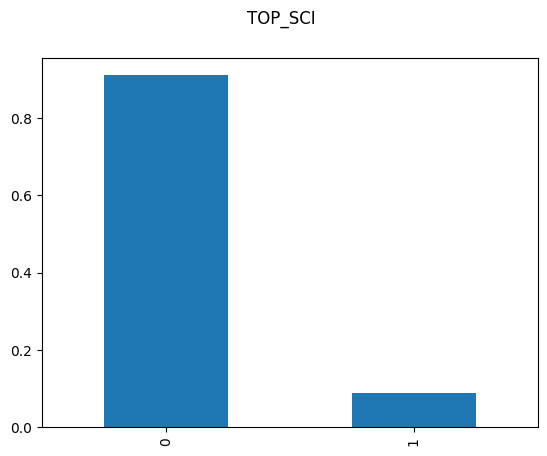

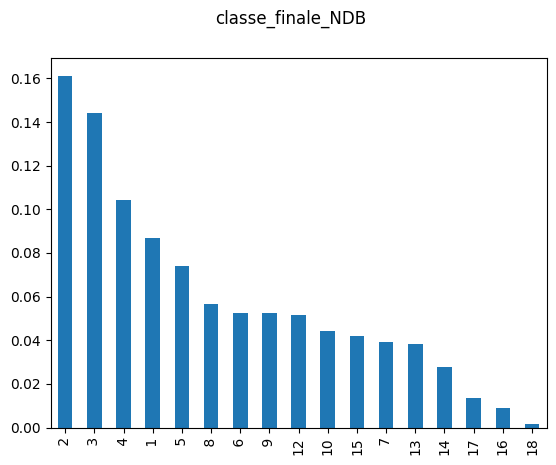

In [37]:
for x in base_travail[categorical_columns].columns:
    if x != 'date':
       fig = plt.figure()
       base_travail[x].value_counts(normalize=True).plot(kind='bar')
       fig.suptitle(x)

In [38]:
"""
import seaborn as sns
for col in (outlier(base_travail[numerical_columns])):
    sns.kdeplot(base_travail[col], shade=True)
    plt.title('Histogramme et densité de probabilité de la variable')
    plt.xlabel(f' {col}')
    plt.ylabel('Fréquence/Densité')
    plt.show()
"""

"\nimport seaborn as sns\nfor col in (outlier(base_travail[numerical_columns])):\n    sns.kdeplot(base_travail[col], shade=True)\n    plt.title('Histogramme et densité de probabilité de la variable')\n    plt.xlabel(f' {col}')\n    plt.ylabel('Fréquence/Densité')\n    plt.show()\n"

In [39]:
"""
for col in (outlier(base_travail[numerical_columns])):
    
   fig = plt.figure()
   base_travail[col].hist()
   fig.suptitle(f'histo of {col}')
   plt.show()
"""

"\nfor col in (outlier(base_travail[numerical_columns])):\n    \n   fig = plt.figure()\n   base_travail[col].hist()\n   fig.suptitle(f'histo of {col}')\n   plt.show()\n"

In [40]:
# # summarize the number of rows with missing values for each column
# i =0
# for col in base_travail.columns:
#     # count number of rows with missing values
#     n_miss = base_travail[[col]].isnull().sum()
#     perc = (n_miss /len(base_travail)) * 100
#     print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))
#     i+=1

# Correlation entre les variables

### Avant de faire ça, je supprime veux supprimer toutes les variables numériques du DataFrame qui contiennent au moins 95% de la même valeur

In [41]:
import pandas as pd


new_numerical_columns = []

for col in numerical_columns:  
    most_frequent_value_count = base_travail[col].value_counts(normalize=True).iloc[0]  # Trouve le pourcentage de la valeur la plus fréquente
    if most_frequent_value_count < 0.95:  # Si moins de 95% des valeurs sont les mêmes
        new_numerical_columns.append(col)  # Ajoute la colonne à la liste des variables à conserver

# Crée un nouveau DataFrame sans les colonnes qui ne satisfont pas la condition
numerical_columns = new_numerical_columns
len(numerical_columns)


133

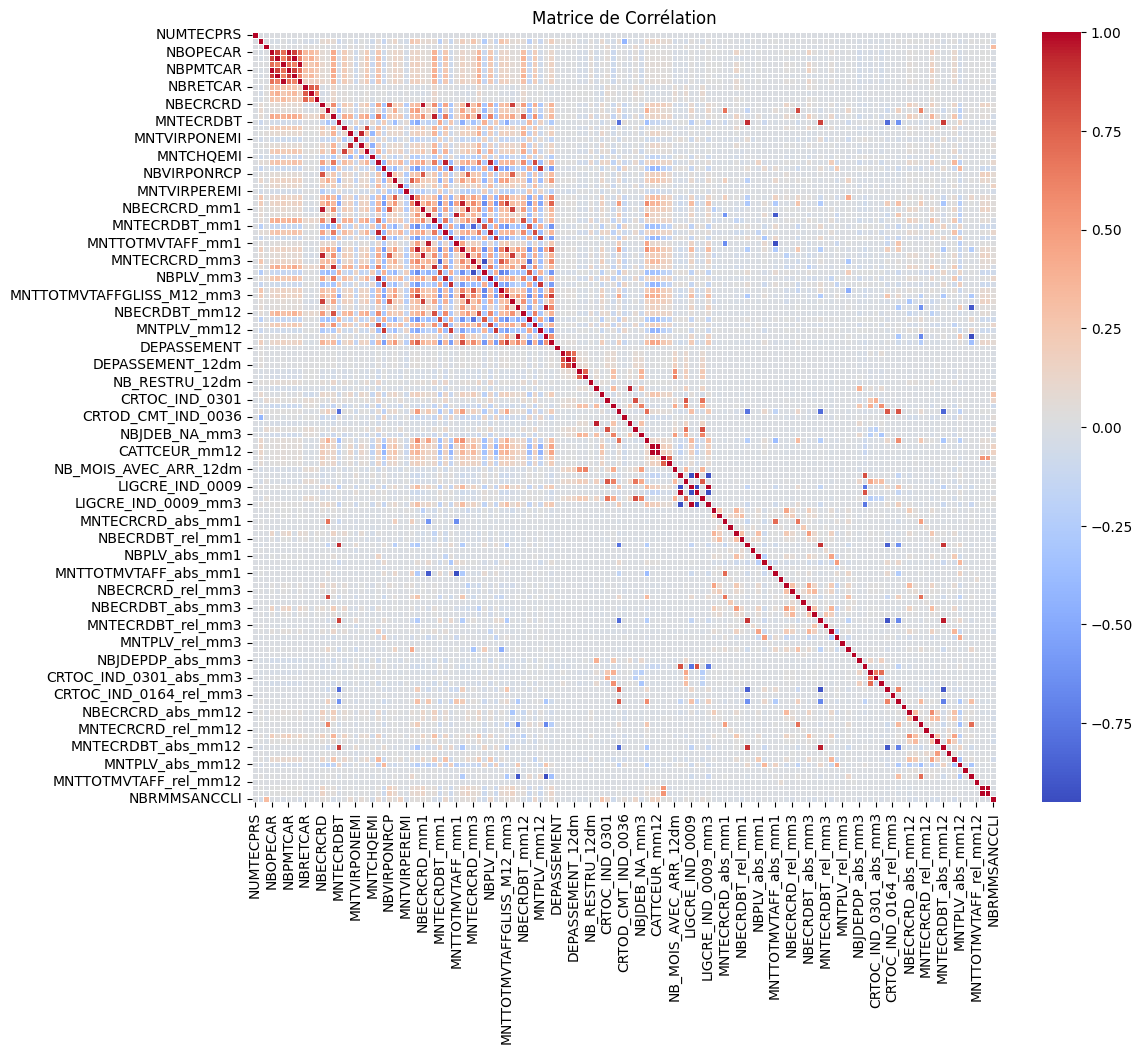

In [42]:
# Calculez la matrice de corrélation
correlation_matrix_quan = base_travail[numerical_columns].corr()

# Créez une carte de chaleur (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_quan,cmap='coolwarm', linewidths=.5)

# Ajoutez un titre
plt.title('Matrice de Corrélation')

# Affichez le graphique
plt.show()

In [43]:
# Définissez un seuil de corrélation (par exemple, 0.8)
seuil_surveillance = 0.7
seuil_dangereux = 0.8
seuil_inacceptable= 0.9

# Trouvez les paires de variables corrélées
variable_pairs_surv = []
variable_pairs_dangereux = []
variable_pairs_inacceptable = []

for i in range(len(correlation_matrix_quan.columns)):
    for j in range(i+1, len(correlation_matrix_quan.columns)):
        if abs(correlation_matrix_quan.iloc[i, j]) > seuil_inacceptable:
            variable_pairs_inacceptable.append((base_travail[numerical_columns].columns[i], base_travail[numerical_columns].columns[j]))
        elif abs(correlation_matrix_quan.iloc[i, j]) > seuil_dangereux:
            variable_pairs_dangereux.append((base_travail[numerical_columns].columns[i], base_travail[numerical_columns].columns[j]))
        elif abs(correlation_matrix_quan.iloc[i, j]) > seuil_surveillance:
            variable_pairs_surv.append((base_travail[numerical_columns].columns[i], base_travail[numerical_columns].columns[j]))

# Affichez les paires de variables corrélées
print("Paires de variables avec des corrélations inacceptables :")
for pair in variable_pairs_inacceptable:
    print(pair)
print("Paires de variables avec des corrélations dangereuses :")
for pair in variable_pairs_dangereux:
    print(pair)
print("Paires de variables avec des corrélations à surveiller :")
for pair in variable_pairs_surv:
    print(pair)

Paires de variables avec des corrélations inacceptables :
('NBOPECAR', 'NBPMTCAR')
('NBOPECARGLISS_M12', 'NBPMTCARGLISS_M12')
('MNTOPECAR', 'MNTPMTCAR')
('NBECRCRD', 'NBECRCRD_mm1')
('NBECRCRD', 'NBECRCRD_mm3')
('NBECRDBT', 'NBECRDBT_mm1')
('NBECRDBT', 'NBECRDBT_mm3')
('MNTECRDBT', 'MNTECRDBT_abs_mm1')
('NBVIRPONEMIGLISS_M12', 'NBCHQEMI')
('NBPLV', 'NBPLV_mm1')
('NBPLV', 'NBPLV_mm3')
('MNTPLV', 'MNTPLV_mm1')
('MNTPLV', 'MNTPLV_mm3')
('MNTTOTMVTAFFGLISS_M12', 'MNTTOTMVTAFFGLISS_M12_mm1')
('NBECRCRD_mm1', 'NBECRCRD_mm3')
('MNTECRCRD_mm1', 'MNTTOTMVTAFF_mm1')
('NBECRDBT_mm1', 'NBECRDBT_mm3')
('NBPLV_mm1', 'NBPLV_mm3')
('MNTPLV_mm1', 'MNTPLV_mm3')
('MNTTOTMVTAFF_mm1', 'MNTTOTMVTAFF_abs_mm1')
('MNTTOTMVTAFFGLISS_M12_mm1', 'MNTTOTMVTAFFGLISS_M12_mm3')
('MNTECRCRD_mm3', 'MNTECRDBT_mm3')
('MNTECRCRD_mm12', 'MNTTOTMVTAFF_mm12')
('MNTTOTMVTAFF_mm12', 'MNTTOTMVTAFF_abs_mm12')
('NBJDEPDP', 'NBJDEPDP_mm3')
('CATTCEUR', 'CATTCEUR_mm12')
('LIGDEB_IND_0015', 'LIGCRE_IND_0009')
('LIGDEB_IND_0015', 'LIG

In [44]:
pairs_vars_suppr = variable_pairs_inacceptable + variable_pairs_dangereux
pairs_vars_suppr

[('NBOPECAR', 'NBPMTCAR'),
 ('NBOPECARGLISS_M12', 'NBPMTCARGLISS_M12'),
 ('MNTOPECAR', 'MNTPMTCAR'),
 ('NBECRCRD', 'NBECRCRD_mm1'),
 ('NBECRCRD', 'NBECRCRD_mm3'),
 ('NBECRDBT', 'NBECRDBT_mm1'),
 ('NBECRDBT', 'NBECRDBT_mm3'),
 ('MNTECRDBT', 'MNTECRDBT_abs_mm1'),
 ('NBVIRPONEMIGLISS_M12', 'NBCHQEMI'),
 ('NBPLV', 'NBPLV_mm1'),
 ('NBPLV', 'NBPLV_mm3'),
 ('MNTPLV', 'MNTPLV_mm1'),
 ('MNTPLV', 'MNTPLV_mm3'),
 ('MNTTOTMVTAFFGLISS_M12', 'MNTTOTMVTAFFGLISS_M12_mm1'),
 ('NBECRCRD_mm1', 'NBECRCRD_mm3'),
 ('MNTECRCRD_mm1', 'MNTTOTMVTAFF_mm1'),
 ('NBECRDBT_mm1', 'NBECRDBT_mm3'),
 ('NBPLV_mm1', 'NBPLV_mm3'),
 ('MNTPLV_mm1', 'MNTPLV_mm3'),
 ('MNTTOTMVTAFF_mm1', 'MNTTOTMVTAFF_abs_mm1'),
 ('MNTTOTMVTAFFGLISS_M12_mm1', 'MNTTOTMVTAFFGLISS_M12_mm3'),
 ('MNTECRCRD_mm3', 'MNTECRDBT_mm3'),
 ('MNTECRCRD_mm12', 'MNTTOTMVTAFF_mm12'),
 ('MNTTOTMVTAFF_mm12', 'MNTTOTMVTAFF_abs_mm12'),
 ('NBJDEPDP', 'NBJDEPDP_mm3'),
 ('CATTCEUR', 'CATTCEUR_mm12'),
 ('LIGDEB_IND_0015', 'LIGCRE_IND_0009'),
 ('LIGDEB_IND_0015', 'LIGDEB

In [45]:
vars_suppr_quan =['NBJ_ARR']

for pair in pairs_vars_suppr:
    if float(Kw_test['H-statistic'][Kw_test['Variable']==pair[0]]) < float(Kw_test['H-statistic'][Kw_test['Variable']==pair[1]]):
        vars_suppr_quan.append(pair[0])
    else:
        vars_suppr_quan.append(pair[1])
vars_suppr_quan

['NBJ_ARR',
 'NBOPECAR',
 'NBOPECARGLISS_M12',
 'MNTOPECAR',
 'NBECRCRD_mm1',
 'NBECRCRD_mm3',
 'NBECRDBT_mm1',
 'NBECRDBT_mm3',
 'MNTECRDBT_abs_mm1',
 'NBCHQEMI',
 'NBPLV_mm1',
 'NBPLV_mm3',
 'MNTPLV_mm1',
 'MNTPLV_mm3',
 'MNTTOTMVTAFFGLISS_M12_mm1',
 'NBECRCRD_mm3',
 'MNTTOTMVTAFF_mm1',
 'NBECRDBT_mm3',
 'NBPLV_mm3',
 'MNTPLV_mm3',
 'MNTTOTMVTAFF_abs_mm1',
 'MNTTOTMVTAFFGLISS_M12_mm3',
 'MNTECRCRD_mm3',
 'MNTTOTMVTAFF_mm12',
 'MNTTOTMVTAFF_abs_mm12',
 'NBJDEPDP_mm3',
 'CATTCEUR',
 'LIGDEB_IND_0015',
 'LIGDEB_IND_0015_mm3',
 'LIGDEB_IND_0015',
 'LIGDEB_IND_0015_mm3',
 'LIGCRE_IND_0009_mm3',
 'LIGDEB_IND_0015_mm3',
 'MNTECRDBT_abs_mm1',
 'MNTECRDBT_abs_mm1',
 'CRTOC_IND_0164_abs_mm3',
 'MNTECRDBT_abs_mm3',
 'EVOL_NB_SALARIE',
 'NBOPECARGLISS_M12',
 'NBPMTCARGLISS_M12',
 'NBOPECARGLISS_M12',
 'NBPMTCARGLISS_M12',
 'NBECRCRD_mm12',
 'MNTECRCRD_abs_mm3',
 'NBECRDBT_mm12',
 'MNTECRDBT_abs_mm3',
 'CRTOC_IND_0164_abs_mm3',
 'MNTECRDBT_abs_mm12',
 'NBCHQEMIGLISS_M12',
 'NBPLV_mm12',
 'MNTPLV_

In [46]:
print(len(pairs_vars_suppr))
print(len(vars_suppr_quan))
print(len(unique(vars_suppr_quan)))

77
78
46


In [47]:
unique(vars_suppr_quan)

array(['CATTCEUR', 'CRTOC_IND_0164_abs_mm3', 'CRTOC_IND_0301',
       'CRTOC_IND_0301_mm3', 'DEPASSEMENT_12dm', 'DEPASSEMENT_3dm',
       'EVOL_NB_SALARIE', 'LIGCRE_IND_0009_abs_mm3',
       'LIGCRE_IND_0009_mm3', 'LIGDEB_IND_0015',
       'LIGDEB_IND_0015_abs_mm3', 'LIGDEB_IND_0015_mm3',
       'MNTECRCRD_abs_mm3', 'MNTECRCRD_mm3', 'MNTECRDBT_abs_mm1',
       'MNTECRDBT_abs_mm12', 'MNTECRDBT_abs_mm3', 'MNTECRDBT_mm12',
       'MNTECRDBT_mm3', 'MNTOPECAR', 'MNTPLV_mm1', 'MNTPLV_mm12',
       'MNTPLV_mm3', 'MNTTOTMVTAFFGLISS_M12_mm1',
       'MNTTOTMVTAFFGLISS_M12_mm12', 'MNTTOTMVTAFFGLISS_M12_mm3',
       'MNTTOTMVTAFF_abs_mm1', 'MNTTOTMVTAFF_abs_mm12',
       'MNTTOTMVTAFF_mm1', 'MNTTOTMVTAFF_mm12', 'NBCHQEMI',
       'NBCHQEMIGLISS_M12', 'NBECRCRD_mm1', 'NBECRCRD_mm12',
       'NBECRCRD_mm3', 'NBECRDBT_mm1', 'NBECRDBT_mm12', 'NBECRDBT_mm3',
       'NBJDEPDP_mm3', 'NBJ_ARR', 'NBOPECAR', 'NBOPECARGLISS_M12',
       'NBPLV_mm1', 'NBPLV_mm12', 'NBPLV_mm3', 'NBPMTCARGLISS_M12'],
      dty

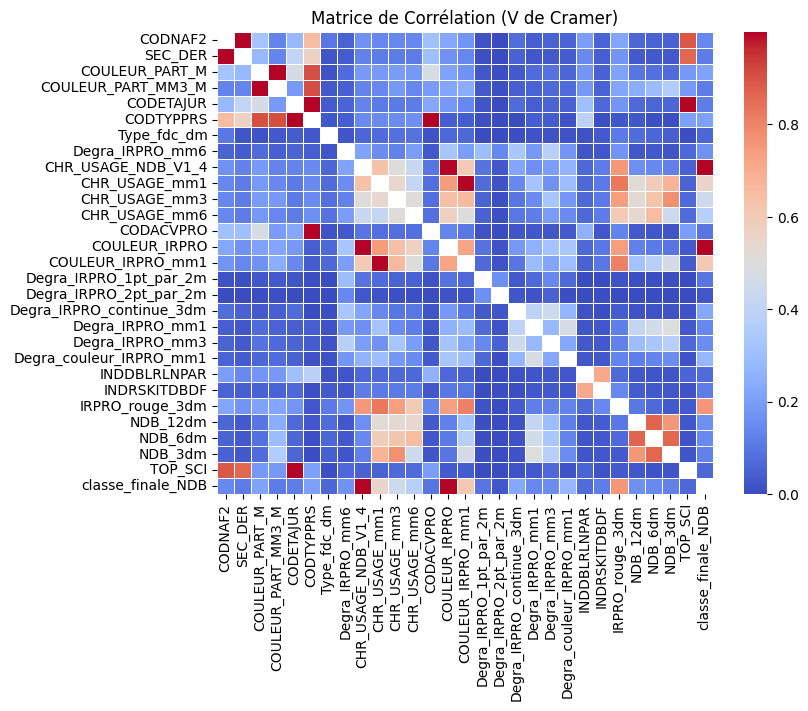

In [48]:
cat_df = base_travail[categorical_columns]
# Fonction pour calculer le V de Cramer
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculez la matrice de corrélation basée sur le V de Cramer
corr_matrix_cat = pd.DataFrame(index=cat_df.columns, columns=cat_df.columns, dtype=float)
for i in cat_df.columns:
    for j in cat_df.columns:
        if i != j:
            confusion_matrix_cat = pd.crosstab(cat_df[i], cat_df[j])
            corr_matrix_cat.loc[i, j] = cramers_v(confusion_matrix_cat)

# Créez une carte de chaleur (heatmap) basée sur le V de Cramer
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_cat, cmap='coolwarm', linewidths=.5)

# Ajoutez un titre
plt.title('Matrice de Corrélation (V de Cramer)')

# Affichez le graphique
plt.show()

In [49]:
seuil_corr = 0.7
variable_pairs_cat_inacceptable = []

for i in range(len(corr_matrix_cat.columns)):
    for j in range(i+1, len(corr_matrix_cat.columns)):
        if abs(corr_matrix_cat.iloc[i, j]) > seuil_corr:
            variable_pairs_cat_inacceptable.append((base_travail[categorical_columns].columns[i], base_travail[categorical_columns].columns[j]))
            
# Affichez les paires de variables corrélées
print("Paires de variables avec des corrélations inacceptables :")
for pair in variable_pairs_cat_inacceptable:
    print(pair)

Paires de variables avec des corrélations inacceptables :
('CODNAF2', 'SEC_DER')
('CODNAF2', 'TOP_SCI')
('SEC_DER', 'TOP_SCI')
('COULEUR_PART_M', 'COULEUR_PART_MM3_M')
('COULEUR_PART_M', 'CODTYPPRS')
('COULEUR_PART_MM3_M', 'CODTYPPRS')
('CODETAJUR', 'CODTYPPRS')
('CODETAJUR', 'TOP_SCI')
('CODTYPPRS', 'CODACVPRO')
('CHR_USAGE_NDB_V1_4', 'COULEUR_IRPRO')
('CHR_USAGE_NDB_V1_4', 'IRPRO_rouge_3dm')
('CHR_USAGE_NDB_V1_4', 'classe_finale_NDB')
('CHR_USAGE_mm1', 'COULEUR_IRPRO')
('CHR_USAGE_mm1', 'COULEUR_IRPRO_mm1')
('CHR_USAGE_mm1', 'IRPRO_rouge_3dm')
('CHR_USAGE_mm3', 'IRPRO_rouge_3dm')
('CHR_USAGE_mm3', 'NDB_3dm')
('COULEUR_IRPRO', 'COULEUR_IRPRO_mm1')
('COULEUR_IRPRO', 'IRPRO_rouge_3dm')
('COULEUR_IRPRO', 'classe_finale_NDB')
('COULEUR_IRPRO_mm1', 'IRPRO_rouge_3dm')
('INDDBLRLNPAR', 'INDRSKITDBDF')
('IRPRO_rouge_3dm', 'classe_finale_NDB')
('NDB_12dm', 'NDB_6dm')
('NDB_12dm', 'NDB_3dm')
('NDB_6dm', 'NDB_3dm')


In [50]:
vars_suppr_cat =[]

Chi2test = chi_squared_test(base_travail,target[target_column],categorical_columns).sort_values(by ='Chi2',ascending = False).round(3)

for pair in variable_pairs_cat_inacceptable:
    if float(Chi2test['V de Cramer'][Chi2test['Variable']==pair[0]]) < float(Chi2test['V de Cramer'][Chi2test['Variable']==pair[1]]):
        vars_suppr_cat.append(pair[0])
    else:
        vars_suppr_cat.append(pair[1])

vars_suppr_cat

['SEC_DER',
 'TOP_SCI',
 'TOP_SCI',
 'COULEUR_PART_M',
 'CODTYPPRS',
 'CODTYPPRS',
 'CODTYPPRS',
 'TOP_SCI',
 'CODTYPPRS',
 'COULEUR_IRPRO',
 'IRPRO_rouge_3dm',
 'CHR_USAGE_NDB_V1_4',
 'COULEUR_IRPRO',
 'COULEUR_IRPRO_mm1',
 'IRPRO_rouge_3dm',
 'IRPRO_rouge_3dm',
 'NDB_3dm',
 'COULEUR_IRPRO_mm1',
 'IRPRO_rouge_3dm',
 'COULEUR_IRPRO',
 'IRPRO_rouge_3dm',
 'INDDBLRLNPAR',
 'IRPRO_rouge_3dm',
 'NDB_6dm',
 'NDB_3dm',
 'NDB_3dm']

In [51]:
print(len(base_travail[categorical_columns].columns))
print(len(variable_pairs_cat_inacceptable))
print(len(vars_suppr_cat))
print(len(unique(vars_suppr_cat)))

29
26
26
11


In [52]:
vars_suppr = list(set(vars_suppr_cat))+list(set(vars_suppr_quan))

base_travail_decorr = base_travail.drop(vars_suppr, axis = 1).copy()

print(len(base_travail_decorr.columns))

126


In [71]:
X_test = X_test.drop(vars_suppr, axis = 1)
print(len(X_test.columns))

125


# Selection des variables

Text(0.5, 1.0, 'Variables catégorielles dépendantes de la variable cible')

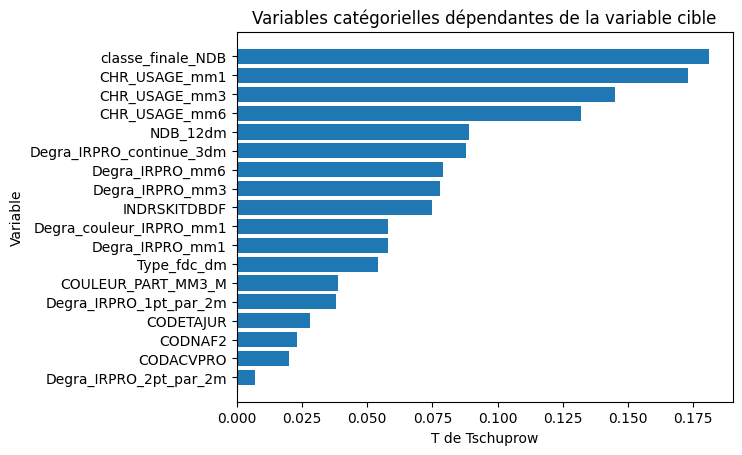

In [53]:
categorical_columns_decorr = [col for col in categorical_columns if col not in vars_suppr_cat]

base_test2_chi2= chi_squared_test(base_travail_decorr,target[target_column],categorical_columns_decorr).sort_values(by ='Tschuprow T',ascending = True).round(3)
plt.barh(base_test2_chi2['Variable'], base_test2_chi2['Tschuprow T'])

# Ajoutez des étiquettes et un titre
plt.xlabel('T de Tschuprow')
plt.ylabel('Variable')
plt.title('Variables catégorielles dépendantes de la variable cible')

Text(0.5, 1.0, 'Variables catégorielles dépendantes de la variable cible')

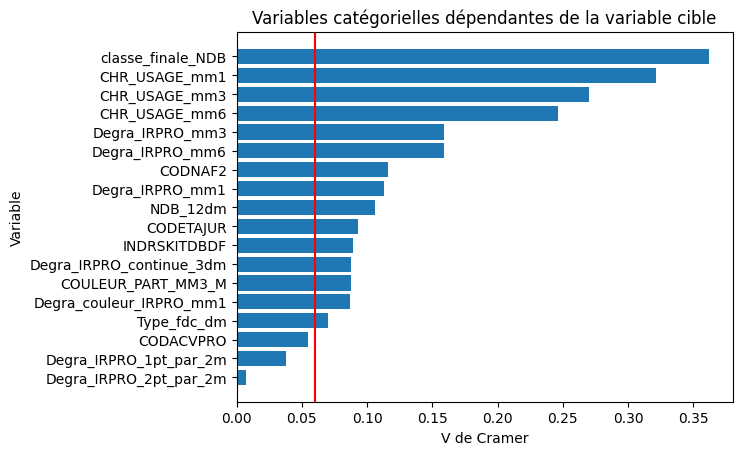

In [54]:
base_test3_chi2= chi_squared_test(base_travail_decorr,target[target_column],categorical_columns_decorr).sort_values(by ='V de Cramer',ascending = True).round(3)
plt.barh(base_test3_chi2['Variable'], base_test3_chi2['V de Cramer'])

# Ajoutez des étiquettes et un titre
plt.xlabel('V de Cramer')
plt.ylabel('Variable')
plt.axvline(x=0.06, color='red')
plt.title('Variables catégorielles dépendantes de la variable cible')

In [55]:
vars_cat_sel = base_test3_chi2['Variable'][base_test3_chi2['V de Cramer']>0.06]
vars_cat_sel

3                  Type_fdc_dm
14     Degra_couleur_IRPRO_mm1
1           COULEUR_PART_MM3_M
11    Degra_IRPRO_continue_3dm
15                INDRSKITDBDF
2                    CODETAJUR
16                    NDB_12dm
12             Degra_IRPRO_mm1
0                      CODNAF2
4              Degra_IRPRO_mm6
13             Degra_IRPRO_mm3
7                CHR_USAGE_mm6
6                CHR_USAGE_mm3
5                CHR_USAGE_mm1
17           classe_finale_NDB
Name: Variable, dtype: object

Text(0.5, 1.0, 'Variables quantitatives dépendantes de la variable cible')

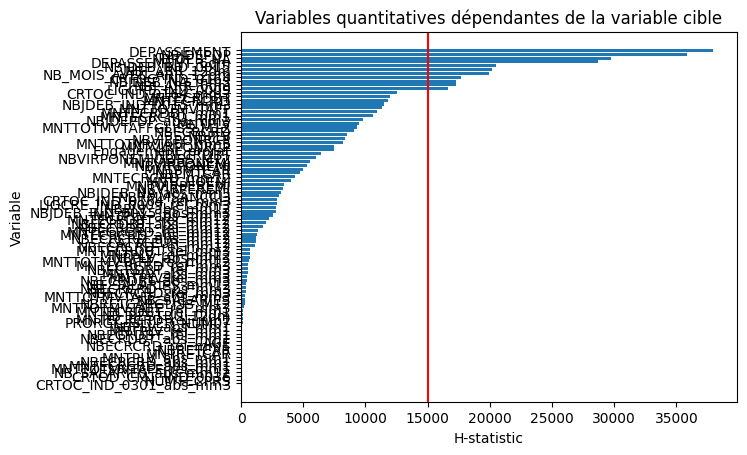

In [101]:
numerical_columns_decorr = [col for col in numerical_columns if col not in vars_suppr_quan]

Kw_test_decorr = kruskal_wallis_test(base_travail_decorr, target_column, target, numerical_columns_decorr).sort_values(by = 'H-statistic', ascending=True)

plt.barh(Kw_test_decorr['Variable'], Kw_test_decorr['H-statistic'])

# Ajoutez des étiquettes et un titre
plt.xlabel('H-statistic')
plt.ylabel('Variable')
plt.axvline(x=15000, color='red')
plt.title('Variables quantitatives dépendantes de la variable cible')

In [102]:
vars_quan_sel = Kw_test_decorr['Variable'][Kw_test_decorr['H-statistic']>15000]
vars_quan_sel

45          LIGCRE_IND_0009
30              NBJ_ARR_6dm
38            NBJDEB_NA_mm3
36           CRTOC_IND_0164
43    NB_MOIS_AVEC_ARR_12dm
31             NBJ_ARR_12dm
44          NBJDEB_IND_0015
29          DEPASSEMENT_6dm
35                NBJDEB_NA
33                 NBJDEPDP
28              DEPASSEMENT
Name: Variable, dtype: object

In [103]:
vars_sel = list(vars_cat_sel)+list(vars_quan_sel)
vars_sel

['Type_fdc_dm',
 'Degra_couleur_IRPRO_mm1',
 'COULEUR_PART_MM3_M',
 'Degra_IRPRO_continue_3dm',
 'INDRSKITDBDF',
 'CODETAJUR',
 'NDB_12dm',
 'Degra_IRPRO_mm1',
 'CODNAF2',
 'Degra_IRPRO_mm6',
 'Degra_IRPRO_mm3',
 'CHR_USAGE_mm6',
 'CHR_USAGE_mm3',
 'CHR_USAGE_mm1',
 'classe_finale_NDB',
 'LIGCRE_IND_0009',
 'NBJ_ARR_6dm',
 'NBJDEB_NA_mm3',
 'CRTOC_IND_0164',
 'NB_MOIS_AVEC_ARR_12dm',
 'NBJ_ARR_12dm',
 'NBJDEB_IND_0015',
 'DEPASSEMENT_6dm',
 'NBJDEB_NA',
 'NBJDEPDP',
 'DEPASSEMENT']

In [104]:
len(vars_sel)

26

## Discrétisation des variables

In [105]:
"""
variable_dis = base_travail['CRTOD_CMT_IND_0036']
q25, q75 = percentile(variable_dis, 25), percentile(variable_dis, 75)
            # define outliers
iqr = q75 - q25
            # calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
"""

"\nvariable_dis = base_travail['CRTOD_CMT_IND_0036']\nq25, q75 = percentile(variable_dis, 25), percentile(variable_dis, 75)\n            # define outliers\niqr = q75 - q25\n            # calculate the outlier cutoff\ncut_off = iqr * 1.5\nlower, upper = q25 - cut_off, q75 + cut_off\n"

In [106]:
"""
filtered_values = variable_dis[(variable_dis >= lower) & (variable_dis <= upper)]
print(filtered_values)
"""

'\nfiltered_values = variable_dis[(variable_dis >= lower) & (variable_dis <= upper)]\nprint(filtered_values)\n'

In [107]:
#filtered_values.hist(bins=10)

In [108]:
"""
import pandas as pd

variables_to_keep = []

for col in numerical_columns:  # Sélectionne uniquement les colonnes numériques
    if col != 'date':
        quantile_95 = base_travail[col].quantile(0.95)  # Calcule le 95e percentile
        if not (base_travail[col].dropna() < quantile_95).any():
            variables_to_keep.append(col)

# 'variables_to_keep' contient maintenant les noms des colonnes qui satisfont la condition
print(variables_to_keep)
"""

"\nimport pandas as pd\n\nvariables_to_keep = []\n\nfor col in numerical_columns:  # Sélectionne uniquement les colonnes numériques\n    if col != 'date':\n        quantile_95 = base_travail[col].quantile(0.95)  # Calcule le 95e percentile\n        if not (base_travail[col].dropna() < quantile_95).any():\n            variables_to_keep.append(col)\n\n# 'variables_to_keep' contient maintenant les noms des colonnes qui satisfont la condition\nprint(variables_to_keep)\n"

In [109]:
"""
deciles = base_travail['MNTECSCPTEPA'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

base_travail['MNTECSCPTEPA'].quantile([0.95])
"""

"\ndeciles = base_travail['MNTECSCPTEPA'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])\n\nbase_travail['MNTECSCPTEPA'].quantile([0.95])\n"

In [110]:
discret = base_travail[vars_sel+['date']].copy()
discret['target_column'] = target.copy().astype(int)

In [119]:
discret_test = X_test[vars_sel+['date']].copy()
discret_test['target_column'] = y_test.copy().astype(int)

In [111]:
"""
discret['decile'] = pd.qcut(discret['CRTOC_IND_0164'], 10, labels=False, duplicates='drop')

discret['NB_MOIS_AVEC_ARR_12dm'].nunique()
"""


"\ndiscret['decile'] = pd.qcut(discret['CRTOC_IND_0164'], 10, labels=False, duplicates='drop')\n\ndiscret['NB_MOIS_AVEC_ARR_12dm'].nunique()\n"

In [112]:

for col in vars_quan_sel:
    discret['decile'] = pd.qcut(discret[col], 10, labels=None, duplicates='drop')
    
    df_grouped = discret.groupby('decile').agg(
        taux_risque=('target_column', lambda x: x.mean()*100),       # Calcul du taux de risque
        population=('target_column', 'size') 
    )
    
    # Calcul de la proportion de la population pour chaque décile
    df_grouped['proportion'] = df_grouped['population'] / df_grouped['population'].sum()*100
    
    # Afficher le DataFrame groupé avec les proportions
    print("________________________________________________________________________________________________")
    print(col)
    print("________________________________________________________________________________________________")
    print(df_grouped)

print(vars_quan_sel)
   

________________________________________________________________________________________________
LIGCRE_IND_0009
________________________________________________________________________________________________
                               taux_risque  population  proportion
decile                                                            
(-0.001, 745256.4]               15.422778       41724   10.000048
(745256.4, 3447892.2]            10.399291       41724   10.000048
(3447892.2, 8026657.2]            6.859362       41724   10.000048
(8026657.2, 15749405.8]           4.877406       41723    9.999808
(15749405.8, 28849902.0]          3.568689       41724   10.000048
(28849902.0, 51538123.6]          2.533314       41724   10.000048
(51538123.6, 92272689.9]          1.601035       41723    9.999808
(92272689.9, 168230802.4]         1.083309       41724   10.000048
(168230802.4, 361009431.2]        0.627936       41724   10.000048
(361009431.2, 618512624372.0]     0.448183       4172

________________________________________________________________________________________________
NBJ_ARR_12dm
________________________________________________________________________________________________
               taux_risque  population  proportion
decile                                            
(-0.001, 2.0]     3.281001      379244   90.893926
(2.0, 1185.0]    19.326736       37994    9.106074
________________________________________________________________________________________________
NBJDEB_IND_0015
________________________________________________________________________________________________
               taux_risque  population  proportion
decile                                            
(-0.001, 4.0]     1.834959      293576   70.361760
(4.0, 20.0]       7.091477       41289    9.895791
(20.0, 55.0]     12.604796       41032    9.834195
(55.0, 92.0]     15.236690       41341    9.908254
_________________________________________________________________________

In [113]:
discret_dep = discret.copy()
discret_dep['decile'] = pd.qcut(discret_dep['DEPASSEMENT'], 100, labels=None, duplicates='drop')

df_grouped_dep = discret_dep.groupby('decile').agg(
    taux_risque=('target_column', lambda x: x.mean()*100),       # Calcul du taux de risque
    population=('target_column', 'size') 
)

# Calcul de la proportion de la population pour chaque décile
df_grouped_dep['proportion'] = df_grouped_dep['population'] / df_grouped_dep['population'].sum()*100

# Afficher le DataFrame groupé avec les proportions
print("________________________________________________________________________________________________")
print('DEPASSEMENT')
print("________________________________________________________________________________________________")
print(df_grouped_dep)

________________________________________________________________________________________________
DEPASSEMENT
________________________________________________________________________________________________
                    taux_risque  population  proportion
decile                                                 
(-0.001, 2.32]         2.882033      383861   92.000489
(2.32, 8.2]            9.909047        4178    1.001347
(8.2, 17.088]         10.902978        4164    0.997992
(17.088, 30.86]       16.243412        4174    1.000388
(30.86, 50.305]       28.026852        4171    0.999669
(50.305, 64.19]       34.235745        4174    1.000388
(64.19, 83.193]       46.008152        4171    0.999669
(83.193, 190.7]       46.393482        4173    1.000149
(190.7, 771859.14]    17.353787        4172    0.999909


In [114]:
discret_nbjepdp = discret.copy()
discret_nbjepdp['decile'] = pd.qcut(discret_nbjepdp['NBJDEPDP'], 100, labels=None, duplicates='drop')

df_grouped_nbjepdp = discret_nbjepdp.groupby('decile').agg(
    taux_risque=('target_column', lambda x: x.mean()*100),       # Calcul du taux de risque
    population=('target_column', 'size') 
)

# Calcul de la proportion de la population pour chaque décile
df_grouped_nbjepdp['proportion'] = df_grouped_nbjepdp['population'] / df_grouped_nbjepdp['population'].sum()*100

# Afficher le DataFrame groupé avec les proportions
print("________________________________________________________________________________________________")
print('NBJDEPDP')
print("________________________________________________________________________________________________")
print(df_grouped_nbjepdp)

________________________________________________________________________________________________
NBJDEPDP
________________________________________________________________________________________________
                  taux_risque  population  proportion
decile                                               
(-0.001, 2.0]        2.901558      381726   91.488791
(2.0, 3.0]          14.653397        2914    0.698402
(3.0, 5.0]          14.759929        5061    1.212977
(5.0, 9.0]          20.037175        2690    0.644716
(9.0, 21.0]         21.216441        4209    1.008777
(21.0, 27.0]        27.029077        3955    0.947900
(27.0, 35.0]        24.181818        4400    1.054554
(35.0, 61.0]        32.863316        4397    1.053835
(61.0, 117.63]      40.479397        3713    0.889900
(117.63, 3161.0]    24.514738        4173    1.000149


In [115]:
discret_NBJ_ARR_6dm = discret.copy()
discret_NBJ_ARR_6dm['decile'] = pd.qcut(discret_NBJ_ARR_6dm['NBJ_ARR_6dm'], 100, labels=None, duplicates='drop')

df_grouped_NBJ_ARR_6dm = discret_NBJ_ARR_6dm.groupby('decile').agg(
    taux_risque=('target_column', lambda x: x.mean()*100),       # Calcul du taux de risque
    population=('target_column', 'size') 
)

# Calcul de la proportion de la population pour chaque décile
df_grouped_NBJ_ARR_6dm['proportion'] = df_grouped_NBJ_ARR_6dm['population'] / df_grouped_NBJ_ARR_6dm['population'].sum()*100

# Afficher le DataFrame groupé avec les proportions
print("________________________________________________________________________________________________")
print('NBJ_ARR_6dm')
print("________________________________________________________________________________________________")
print(df_grouped_NBJ_ARR_6dm)

________________________________________________________________________________________________
NBJ_ARR_6dm
________________________________________________________________________________________________
                taux_risque  population  proportion
decile                                             
(-0.001, 2.0]      3.648424      391210   93.761834
(2.0, 3.0]        10.546139        1593    0.381796
(3.0, 7.0]        14.191555        4855    1.163604
(7.0, 10.0]       17.044451        3397    0.814164
(10.0, 16.0]      18.720602        4252    1.019083
(16.0, 24.0]      23.158964        3938    0.943826
(24.0, 41.0]      25.507548        3842    0.920817
(41.0, 1185.0]    33.461816        4151    0.994876


In [117]:
vars_quan_sel

45          LIGCRE_IND_0009
30              NBJ_ARR_6dm
38            NBJDEB_NA_mm3
36           CRTOC_IND_0164
43    NB_MOIS_AVEC_ARR_12dm
31             NBJ_ARR_12dm
44          NBJDEB_IND_0015
29          DEPASSEMENT_6dm
35                NBJDEB_NA
33                 NBJDEPDP
28              DEPASSEMENT
Name: Variable, dtype: object

In [120]:

def discretisation(variable,borne,labels):
    discret[f'{variable}_dis'] = pd.cut(discret[variable],
                         bins=borne,
                         labels=labels,
                         right=False) 
    discret_test[f'{variable}_dis'] = pd.cut(discret_test[variable],
                         bins=borne,
                         labels=labels,
                         right=False) 

    
    df_grouped = discret.groupby(f'{variable}_dis').agg(
        taux_risque=('target_column', lambda x: x.mean()*100),       # Calcul du taux de risque
        population=('target_column', 'size') 
    )
    
    # Calcul de la proportion de la population pour chaque décile
    df_grouped['proportion'] = df_grouped['population'] / df_grouped['population'].sum()*100

    print(df_grouped)

variable_adis= ['DEPASSEMENT', 'NBJDEPDP', 'NBJDEB_NA', 'CRTOC_IND_0164', 'NB_MOIS_AVEC_ARR_12dm',
           'NBJDEB_IND_0015', 'LIGCRE_IND_0009', 'NBJDEB_NA_mm3', 'NBJ_ARR_6dm',
               'NBJ_ARR_12dm', 'DEPASSEMENT_6dm']

labels=[['[0,30.86]','(30.86,+inf)'],
        ['[0,2.0]','(2.0,+inf)'],
        ['[0,3]','(3,19.0)','(19.0,+inf)'],
        ['(-inf,16600.0]', '(16600.0,+inf)'],
        ['[0,1.0]','(1.0,+inf)'],
        ['[0,4.0]', '(4.0,20.0]', '(20.0,+inf)'],
        ['[0,3447892.2]','(3447892.2,+inf]'],
        ['(-inf,12.0]','(12.0,+inf]'],
        ['[0,1.0]','(1.0,+inf]'],
        ['[0,2.0]','(2.0,+inf]'],
        ['[0,106.68]','(106.68,+inf]']
        
       ]
borne=[[0,30.86,float('inf')],
       [0,2.0,float('inf')],
       [0,3.0,19.0,float('inf')],
       [-float('inf'), 16600.0, float('inf')],
       [0,1.0,float('inf')],
       [0,4.0,20.0,float('inf')],
       [0,3447892.2,float('inf')],
        [-float('inf'),12.0,float('inf')],
        [0,1.0,float('inf')],
        [0,2.0,float('inf')],
        [0,106.68,float('inf')]
      ]

for i in range(0,len(variable_adis)):
    discretisation(variable_adis[i], borne[i],labels[i])
    
discret_column = [col+str('_dis') for col in variable_adis]

###########################################################################################################
    

                 taux_risque  population  proportion
DEPASSEMENT_dis                                     
[0,30.86]           3.180834      396374   94.999497
(30.86,+inf)       34.403758       20864    5.000503
              taux_risque  population  proportion
NBJDEPDP_dis                                     
[0,2.0]          2.831789      379654   90.992192
(2.0,+inf)      24.039485       37584    9.007808
               taux_risque  population  proportion
NBJDEB_NA_dis                                     
[0,3]             1.936700      328497   78.731324
(3,19.0)          8.784617       47014   11.267909
(19.0,+inf)      22.273348       41727   10.000767
                    taux_risque  population  proportion
CRTOC_IND_0164_dis                                     
(-inf,16600.0]        11.030499      125153    29.99559
(16600.0,+inf)         2.047692      292085    70.00441
                           taux_risque  population  proportion
NB_MOIS_AVEC_ARR_12dm_dis                     

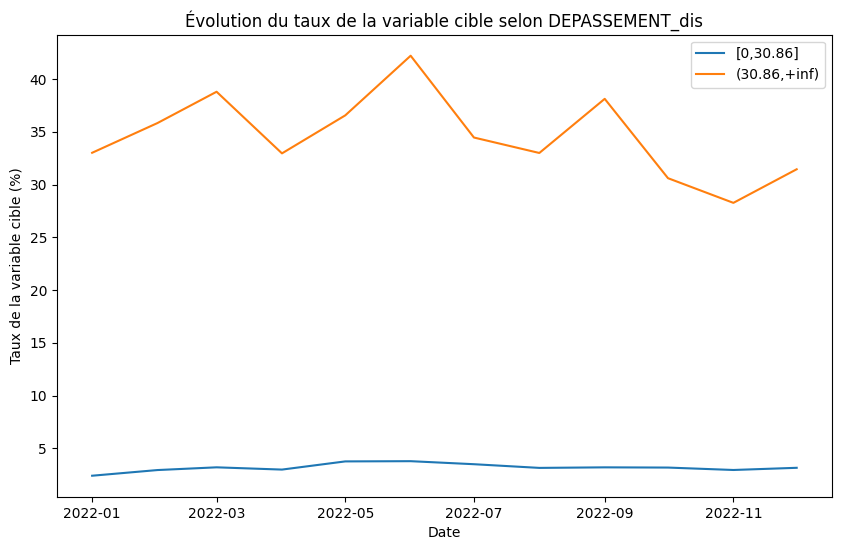

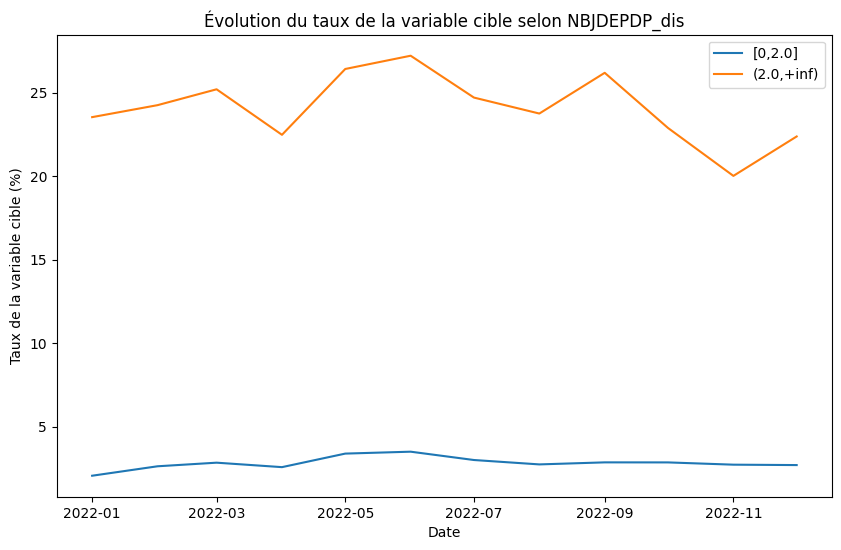

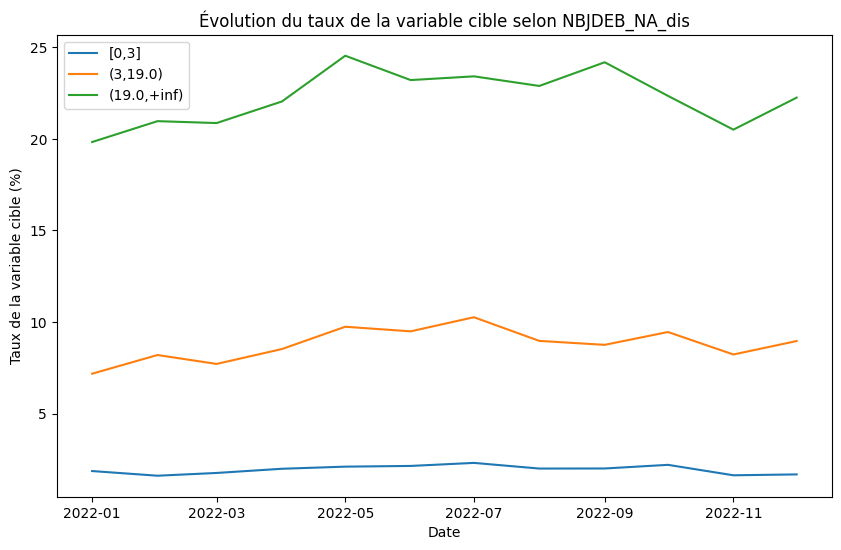

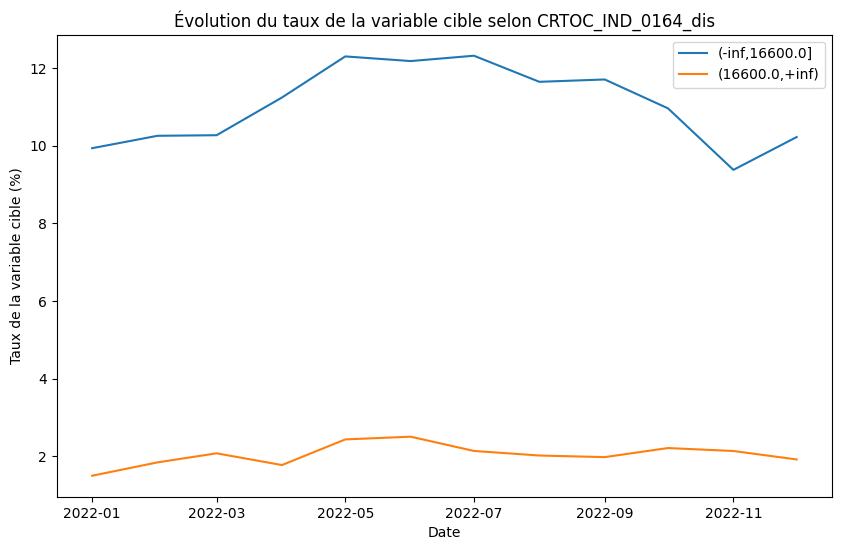

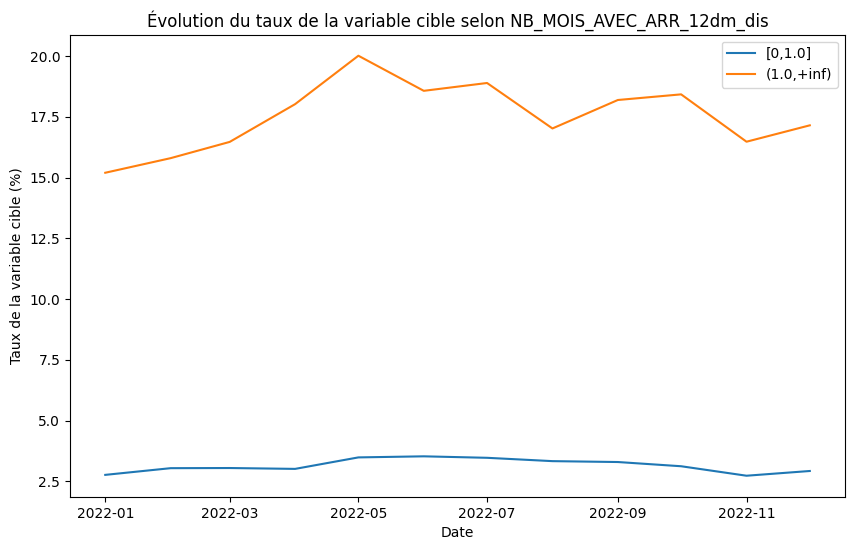

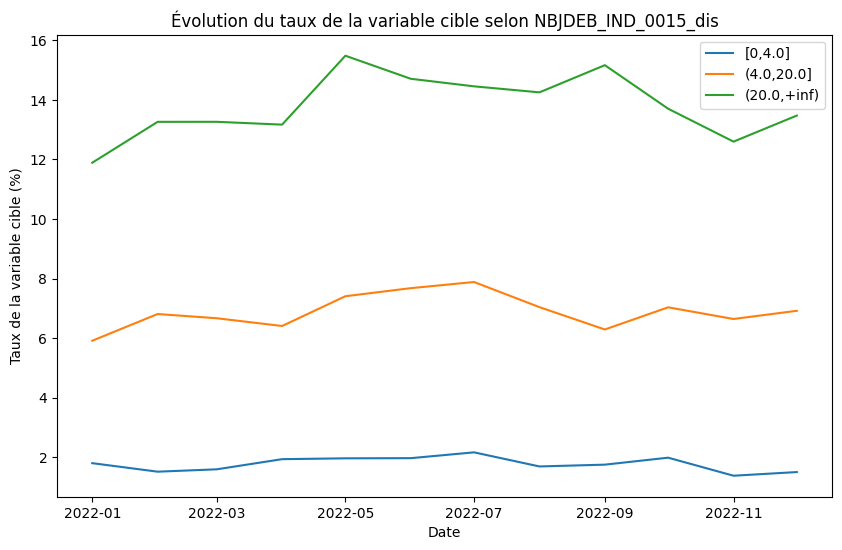

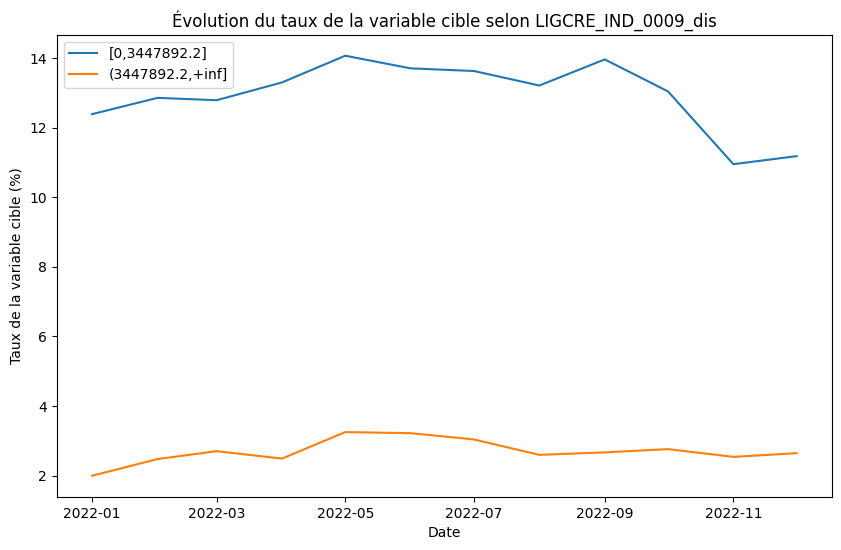

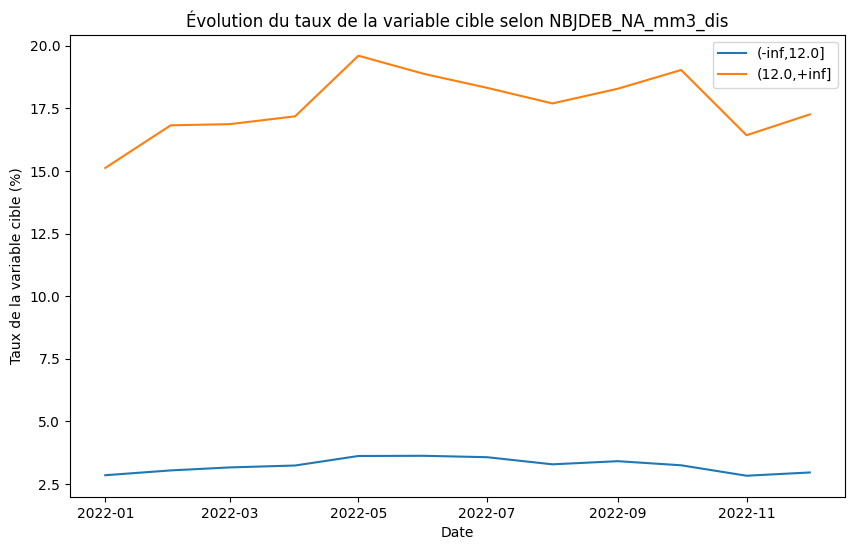

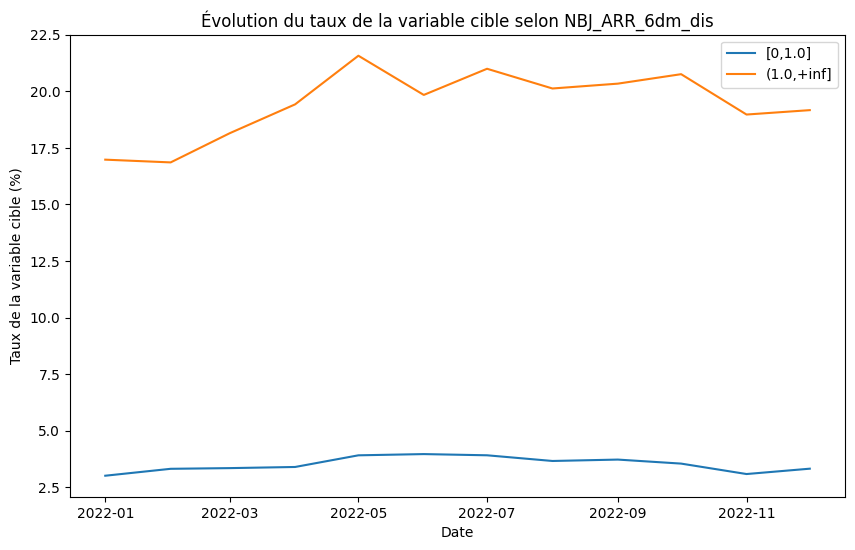

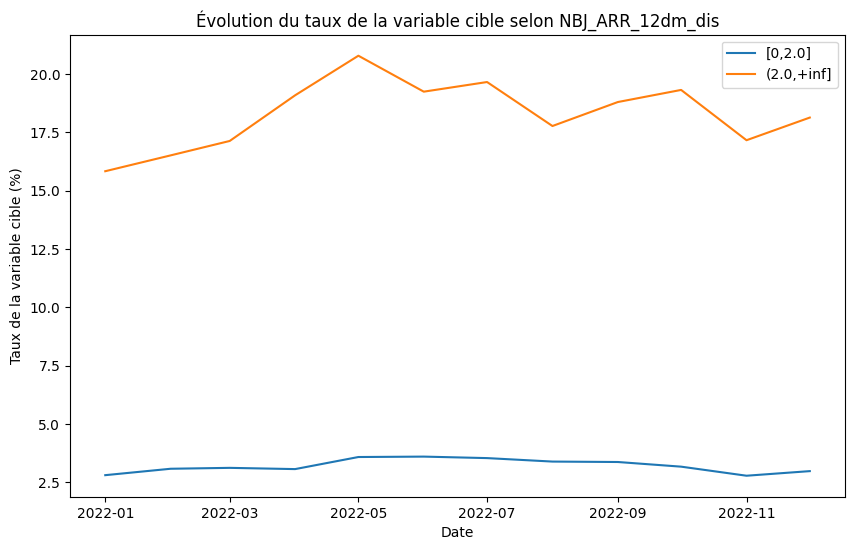

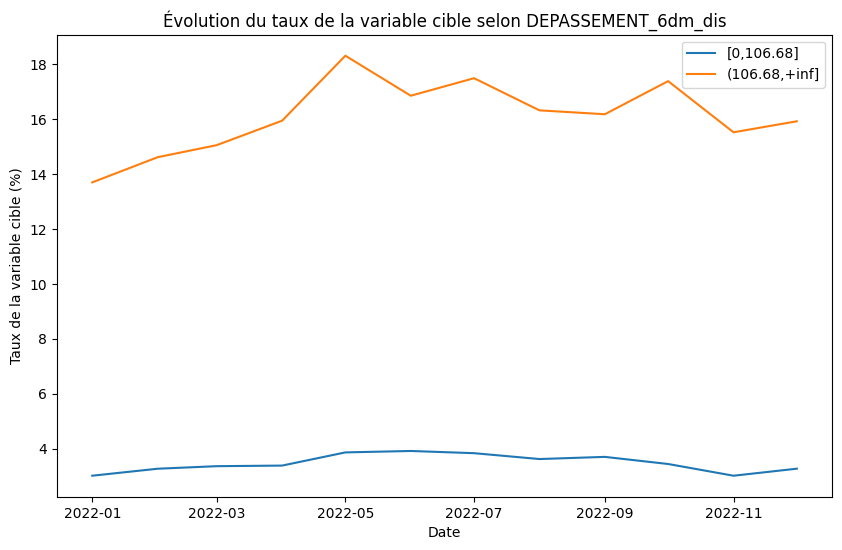

In [121]:
# Calcul du taux de risque moyen dans le temps pour chaque catégorie


for colonne_dis in discret_column:
    df_time_series = discret.groupby(['date', colonne_dis])['target_column'].mean().reset_index()
    
    # Pivote le DataFrame pour avoir les dates en index et les catégories en colonnes
    df_pivot = df_time_series.pivot(index='date', columns=colonne_dis, values='target_column')
    
    # Tracer l'évolution du taux de la variable cible dans le temps pour chaque catégorie
    plt.figure(figsize=(10, 6))
    for category in df_pivot.columns:
        plt.plot(df_pivot.index, df_pivot[category] * 100, label=category)
    
    plt.title(f'Évolution du taux de la variable cible selon {colonne_dis}')
    plt.xlabel('Date')
    plt.ylabel('Taux de la variable cible (%)')
    plt.legend()
    plt.show()

In [122]:
import pandas as pd

# Charger votre DataFrame ici
# df = pd.read_csv('votre_fichier.csv')

# Initialiser un dictionnaire pour contenir les statistiques
statistiques_variables = {}


for variable in numerical_columns:
    statistiques_variables[variable] = {}
    
    for valeur_cible in [0, 1]:
        groupe = base_travail[base_travail[target_column] == valeur_cible]
        
        # Calculer les statistiques pour le groupe actuel
        statistiques = {
            'Moyenne': groupe[variable].mean(),
            'Médiane': groupe[variable].median(),
            'Q1': groupe[variable].quantile(0.25),
            'Q3': groupe[variable].quantile(0.75),
            'Valeurs manquantes': groupe[variable].isna().sum()
        }
        
        # Ajouter les statistiques au dictionnaire
        statistiques_variables[variable][valeur_cible] = statistiques

# # Afficher les statistiques
# for variable, stats in statistiques_variables.items():
#     print(f"{variable}:")
#     for valeur_cible, valeurs in stats.items():
#         print(f"  Cible={valeur_cible}: {valeurs}")
#     print()  # Pour un meilleur formatage dans l'affichage




In [123]:
import pandas as pd


# Créer une liste pour stocker les données du DataFrame
data = []

# Parcourir chaque variable et ses statistiques
for variable, stats in statistiques_variables.items():
    for valeur_cible, statistiques in stats.items():
        # Créer une ligne avec les informations nécessaires
        row = {
            'Variable': variable,
            'Valeur Cible': valeur_cible,
            'Moyenne': statistiques['Moyenne'],
            'Médiane': statistiques['Médiane'],
            'Q1': statistiques['Q1'],
            'Q3': statistiques['Q3'],
            'Valeurs manquantes': statistiques['Valeurs manquantes']
        }
        # Ajouter cette ligne à la liste des données
        data.append(row)

# Créer le DataFrame à partir de la liste des données
df_statistiques = pd.DataFrame(data)

# Afficher le DataFrame
df_statistiques


,Variable,Valeur Cible,Moyenne,Médiane,Q1,Q3,Valeurs manquantes
0,NUMTECPRS,0,6.659254e+10,6.430692e+10,3.097643e+10,9.925124e+10,0
1,NUMTECPRS,1,6.616270e+10,6.429074e+10,2.995430e+10,9.890011e+10,0
2,Engagement_prorat,0,9.110973e+04,2.187131e+04,3.861102e+03,7.546129e+04,0
3,Engagement_prorat,1,3.155347e+04,3.916750e+02,7.027000e+01,2.427204e+04,0
4,AGE,0,4.986801e+01,5.000000e+01,5.000000e+01,5.000000e+01,0
...,...,...,...,...,...,...,...
261,NB_SALARIES_abs_mm12,1,1.060851e-01,0.000000e+00,0.000000e+00,0.000000e+00,0
262,EVOL_NB_SALARIE,0,1.896858e-01,0.000000e+00,0.000000e+00,0.000000e+00,0
263,EVOL_NB_SALARIE,1,1.060851e-01,0.000000e+00,0.000000e+00,0.000000e+00,0
264,NBRMMSANCCLI,0,1.473531e+02,1.000000e+02,4.100000e+01,2.100000e+02,0


## Traitement des variables catégorielles selectionnées

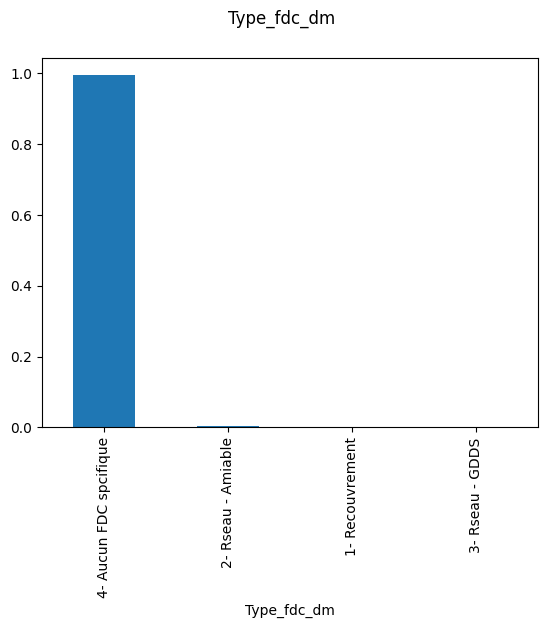

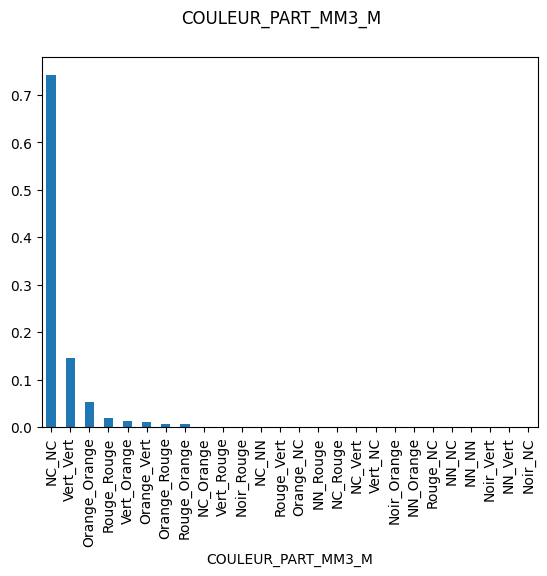

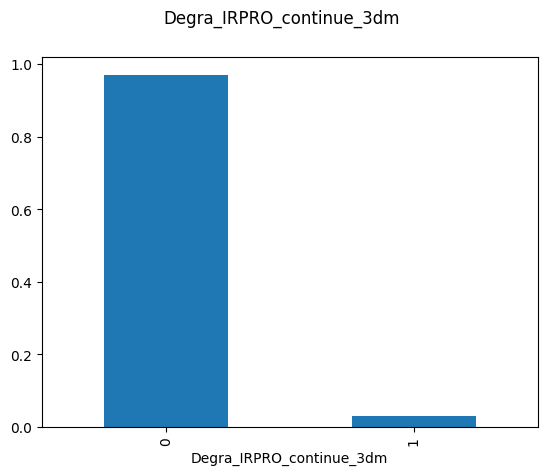

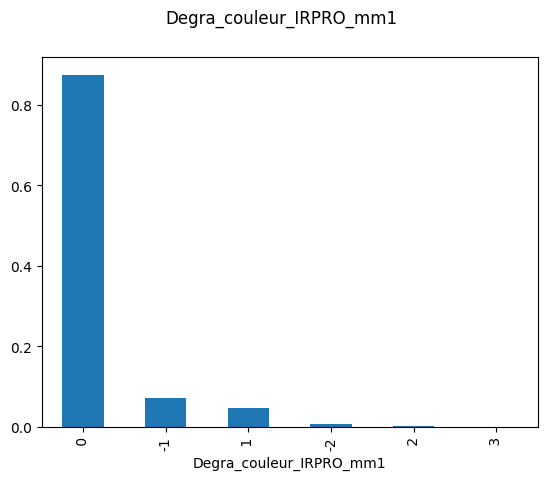

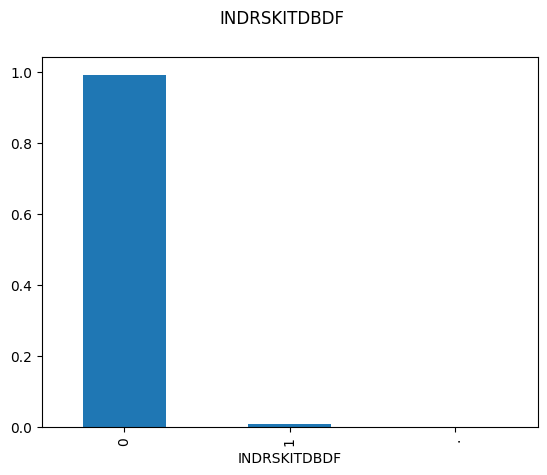

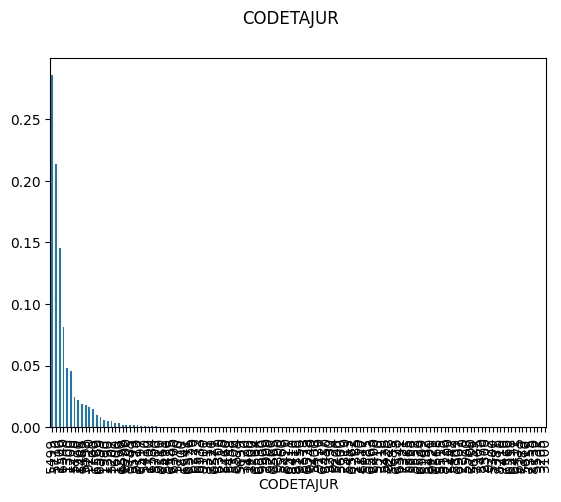

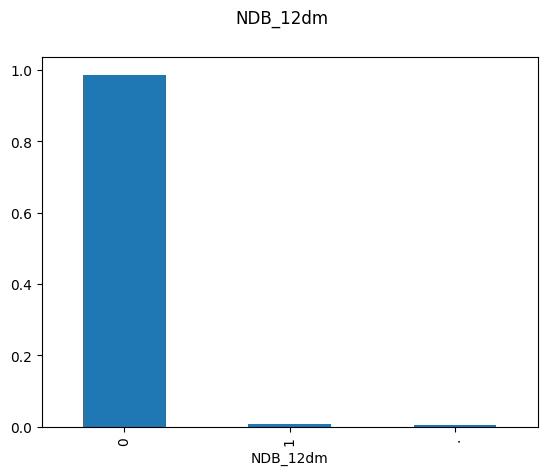

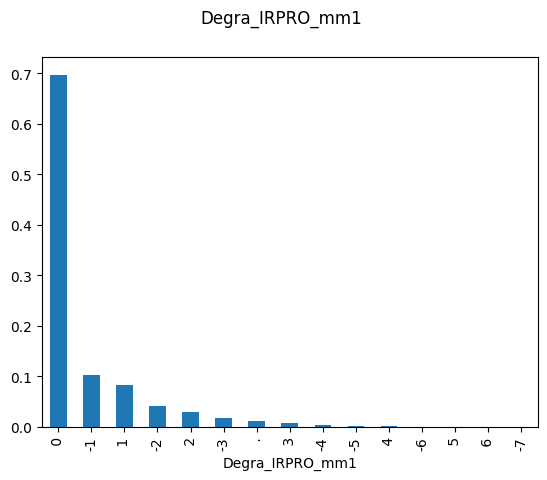

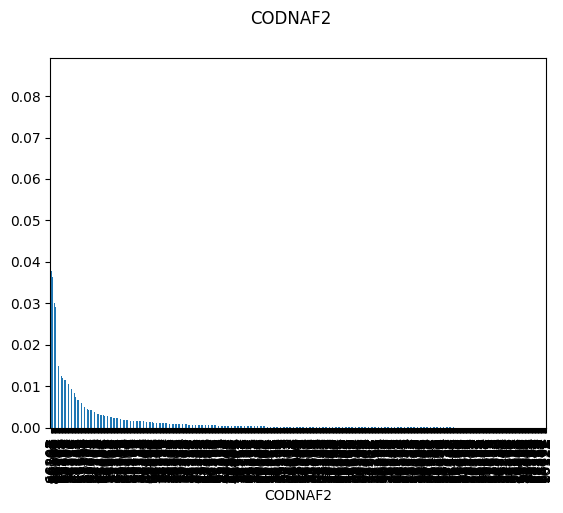

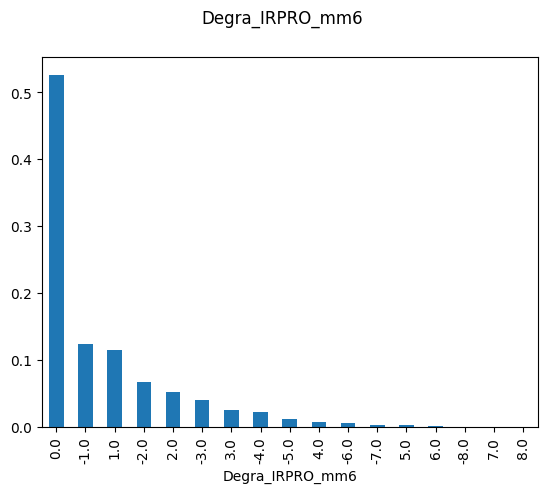

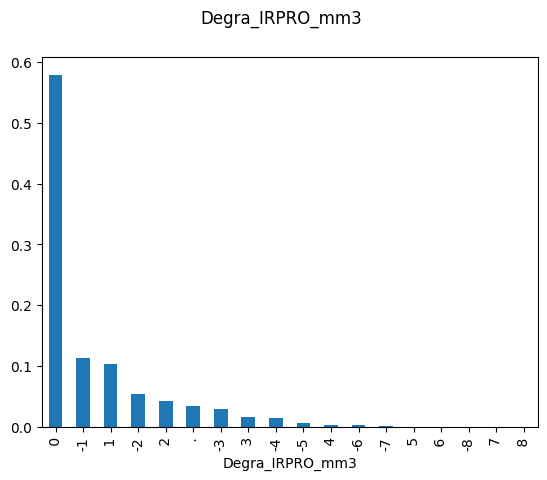

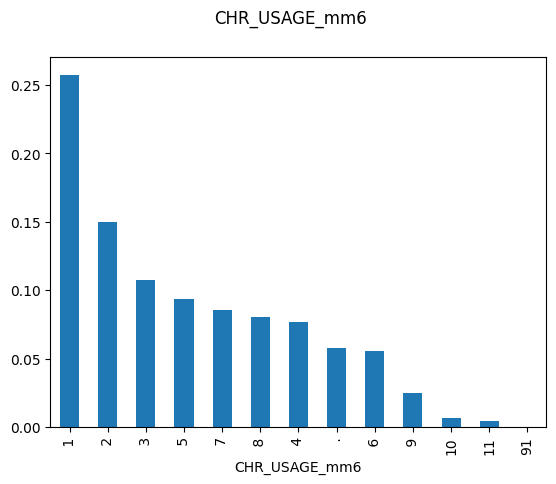

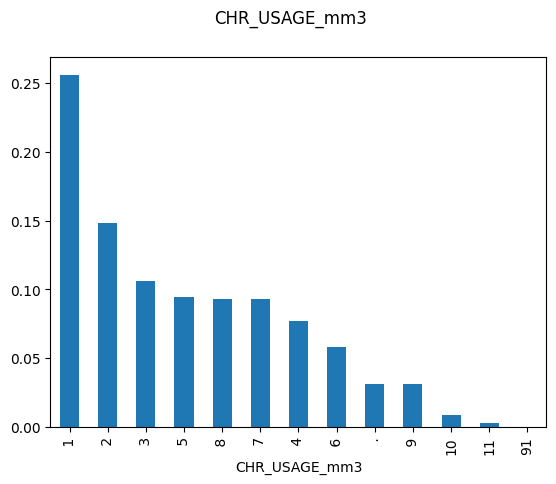

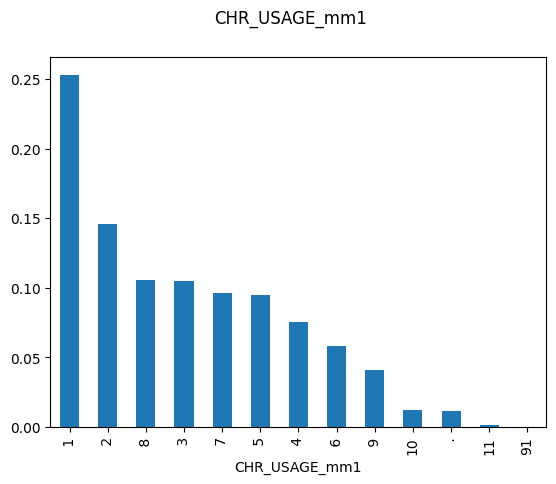

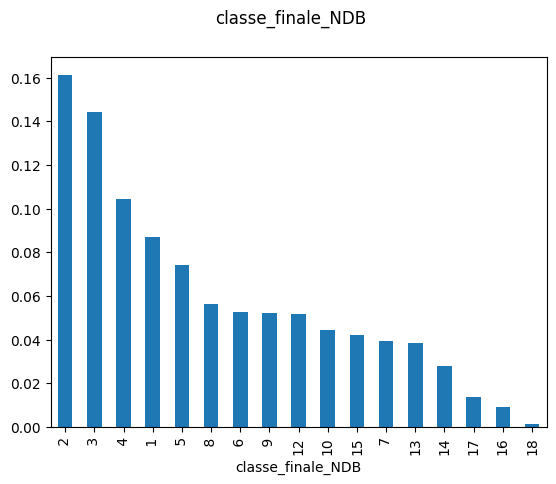

In [ ]:

for col_cat_sel in vars_cat_sel:
   fig = plt.figure()
   base_travail[col_cat_sel].value_counts(normalize=True).plot(kind='bar')
   fig.suptitle(col_cat_sel)

In [124]:
!pip install xlrd

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 96.5/96.5 KB 2.8 MB/s eta 0:00:00


In [125]:
import xlrd
naf_corresp =  pd.read_excel("naf2008_5_niveaux.xls")
naf_corresp = naf_corresp[['NIV5', 'NIV1']]
naf_corresp = naf_corresp.rename(columns={'NIV5': 'CODNAF2', 'NIV1' : 'CODNAF2_NIV1'})

naf_corresp['CODNAF2'] = naf_corresp['CODNAF2'].str.replace('.','', regex = False)
naf_corresp

,CODNAF2,CODNAF2_NIV1
0,0111Z,A
1,0112Z,A
2,0113Z,A
3,0114Z,A
4,0115Z,A
...,...,...
727,9609Z,S
728,9700Z,T
729,9810Z,T
730,9820Z,T


In [126]:
base_travail['CODNAF2']

527714    8121Z
324008    4690Z
464966    8621Z
136481    5610A
113310    6420Z
          ...  
370799    6820B
3560      6420Z
451641    5610A
241106    8690E
145189    4399C
Name: CODNAF2, Length: 417238, dtype: category
Categories (640, object): ['0000Z', '0111Z', '0113Z', '0114Z', ..., '9604Z', '9609Z', '9810Z', '9900Z']

In [127]:
discret = pd.merge(discret, naf_corresp, on='CODNAF2', how='left')
discret_test = pd.merge(discret_test, naf_corresp, on='CODNAF2', how='left')
discret

,Type_fdc_dm,Degra_couleur_IRPRO_mm1,COULEUR_PART_MM3_M,Degra_IRPRO_continue_3dm,INDRSKITDBDF,CODETAJUR,NDB_12dm,Degra_IRPRO_mm1,CODNAF2,Degra_IRPRO_mm6,...,NBJDEB_NA_dis,CRTOC_IND_0164_dis,NB_MOIS_AVEC_ARR_12dm_dis,NBJDEB_IND_0015_dis,LIGCRE_IND_0009_dis,NBJDEB_NA_mm3_dis,NBJ_ARR_6dm_dis,NBJ_ARR_12dm_dis,DEPASSEMENT_6dm_dis,CODNAF2_NIV1
0,4- Aucun FDC spcifique,0,Vert_Vert,0,0,1300,0,0,8121Z,-3.0,...,"[0,3]","(16600.0,+inf)","[0,1.0]","(4.0,20.0]","(3447892.2,+inf]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",N
1,4- Aucun FDC spcifique,0,NC_NC,0,0,5499,0,0,4690Z,0.0,...,"[0,3]","(-inf,16600.0]","[0,1.0]","[0,4.0]","(3447892.2,+inf]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",G
2,4- Aucun FDC spcifique,0,Vert_Vert,1,0,1500,0,-1,8621Z,-1.0,...,"(3,19.0)","(16600.0,+inf)","(1.0,+inf)","(4.0,20.0]","[0,3447892.2]","(12.0,+inf]","[0,1.0]","(2.0,+inf]","[0,106.68]",Q
3,4- Aucun FDC spcifique,0,NC_NC,0,0,5499,0,-2,5610A,-2.0,...,"[0,3]","(-inf,16600.0]","[0,1.0]","[0,4.0]","(3447892.2,+inf]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",I
4,4- Aucun FDC spcifique,0,NC_NC,0,0,5710,0,0,6420Z,0.0,...,"[0,3]","(16600.0,+inf)","[0,1.0]","[0,4.0]","(3447892.2,+inf]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417233,4- Aucun FDC spcifique,0,NC_NC,0,0,6540,0,-1,6820B,-2.0,...,"[0,3]","(16600.0,+inf)","[0,1.0]","[0,4.0]","(3447892.2,+inf]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",L
417234,4- Aucun FDC spcifique,0,NC_NC,0,0,5499,0,0,6420Z,0.0,...,"[0,3]","(16600.0,+inf)","[0,1.0]","[0,4.0]","(3447892.2,+inf]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",K
417235,4- Aucun FDC spcifique,0,NC_NC,0,0,5499,0,0,5610A,2.0,...,"[0,3]","(16600.0,+inf)","[0,1.0]","[0,4.0]","(3447892.2,+inf]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",I
417236,4- Aucun FDC spcifique,0,Vert_Vert,0,0,1500,0,0,8690E,0.0,...,"[0,3]","(-inf,16600.0]","[0,1.0]","[0,4.0]","[0,3447892.2]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",Q


In [128]:
discret['CODNAF2_NIV1'].nunique()

21

In [129]:
discret['CODETAJUR']

0         1300
1         5499
2         1500
3         5499
4         5710
          ... 
417233    6540
417234    5499
417235    5499
417236    1500
417237    5499
Name: CODETAJUR, Length: 417238, dtype: category
Categories (133, object): ['1100', '1200', '1290', '1300', ..., '9240', '9260', '9300', '9900']

In [130]:
def first_carac(code):
    return str(code)[0]

discret['CODETAJUR_1car'] = list(map(first_carac, discret['CODETAJUR']))
discret['CODETAJUR_1car'] = discret['CODETAJUR_1car'].replace('n', 'NA')
discret_test['CODETAJUR_1car'] = list(map(first_carac, discret_test['CODETAJUR']))
discret_test['CODETAJUR_1car'] = discret_test['CODETAJUR_1car'].replace('n', 'NA')
discret

,Type_fdc_dm,Degra_couleur_IRPRO_mm1,COULEUR_PART_MM3_M,Degra_IRPRO_continue_3dm,INDRSKITDBDF,CODETAJUR,NDB_12dm,Degra_IRPRO_mm1,CODNAF2,Degra_IRPRO_mm6,...,CRTOC_IND_0164_dis,NB_MOIS_AVEC_ARR_12dm_dis,NBJDEB_IND_0015_dis,LIGCRE_IND_0009_dis,NBJDEB_NA_mm3_dis,NBJ_ARR_6dm_dis,NBJ_ARR_12dm_dis,DEPASSEMENT_6dm_dis,CODNAF2_NIV1,CODETAJUR_1car
0,4- Aucun FDC spcifique,0,Vert_Vert,0,0,1300,0,0,8121Z,-3.0,...,"(16600.0,+inf)","[0,1.0]","(4.0,20.0]","(3447892.2,+inf]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",N,1
1,4- Aucun FDC spcifique,0,NC_NC,0,0,5499,0,0,4690Z,0.0,...,"(-inf,16600.0]","[0,1.0]","[0,4.0]","(3447892.2,+inf]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",G,5
2,4- Aucun FDC spcifique,0,Vert_Vert,1,0,1500,0,-1,8621Z,-1.0,...,"(16600.0,+inf)","(1.0,+inf)","(4.0,20.0]","[0,3447892.2]","(12.0,+inf]","[0,1.0]","(2.0,+inf]","[0,106.68]",Q,1
3,4- Aucun FDC spcifique,0,NC_NC,0,0,5499,0,-2,5610A,-2.0,...,"(-inf,16600.0]","[0,1.0]","[0,4.0]","(3447892.2,+inf]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",I,5
4,4- Aucun FDC spcifique,0,NC_NC,0,0,5710,0,0,6420Z,0.0,...,"(16600.0,+inf)","[0,1.0]","[0,4.0]","(3447892.2,+inf]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",K,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417233,4- Aucun FDC spcifique,0,NC_NC,0,0,6540,0,-1,6820B,-2.0,...,"(16600.0,+inf)","[0,1.0]","[0,4.0]","(3447892.2,+inf]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",L,6
417234,4- Aucun FDC spcifique,0,NC_NC,0,0,5499,0,0,6420Z,0.0,...,"(16600.0,+inf)","[0,1.0]","[0,4.0]","(3447892.2,+inf]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",K,5
417235,4- Aucun FDC spcifique,0,NC_NC,0,0,5499,0,0,5610A,2.0,...,"(16600.0,+inf)","[0,1.0]","[0,4.0]","(3447892.2,+inf]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",I,5
417236,4- Aucun FDC spcifique,0,Vert_Vert,0,0,1500,0,0,8690E,0.0,...,"(-inf,16600.0]","[0,1.0]","[0,4.0]","[0,3447892.2]","(-inf,12.0]","[0,1.0]","[0,2.0]","[0,106.68]",Q,1


In [131]:
unique(list(discret['CODETAJUR_1car']))

array(['1', '2', '3', '5', '6', '7', '8', '9', 'NA'], dtype='<U2')

In [132]:
vars_cat_sel = vars_cat_sel.replace('CODNAF2','CODNAF2_NIV1').replace('CODETAJUR', 'CODETAJUR_1car')
for col in vars_cat_sel:
    discret[col] = discret[col].astype('category')
    print( discret[col].dtypes)
vars_cat_sel

category
category
category
category
category
category
category
category
category
category
category
category
category
category
category


3                  Type_fdc_dm
14     Degra_couleur_IRPRO_mm1
1           COULEUR_PART_MM3_M
11    Degra_IRPRO_continue_3dm
15                INDRSKITDBDF
2               CODETAJUR_1car
16                    NDB_12dm
12             Degra_IRPRO_mm1
0                 CODNAF2_NIV1
4              Degra_IRPRO_mm6
13             Degra_IRPRO_mm3
7                CHR_USAGE_mm6
6                CHR_USAGE_mm3
5                CHR_USAGE_mm1
17           classe_finale_NDB
Name: Variable, dtype: object

In [133]:
for col in vars_cat_sel:
    
    df_grouped = discret.groupby(col).agg(
        taux_risque=('target_column', lambda x: x.mean()*100),       # Calcul du taux de risque
        population=('target_column', 'size') 
    )
    
    # Calcul de la proportion de la population pour chaque décile
    df_grouped['proportion'] = df_grouped['population'] / df_grouped['population'].sum()*100
    
    # Afficher le DataFrame groupé avec les proportions
    print("________________________________________________________________________________________________")
    print(col)
    print("________________________________________________________________________________________________")
    print(df_grouped)

________________________________________________________________________________________________
Type_fdc_dm
________________________________________________________________________________________________
                        taux_risque  population  proportion
Type_fdc_dm                                                
1- Recouvrement           17.165006         903    0.216423
2- Rseau - Amiable        28.009828        1221    0.292639
3- Rseau - GDDS           26.353791         277    0.066389
4- Aucun FDC spcifique     4.632181      414837   99.424549
________________________________________________________________________________________________
Degra_couleur_IRPRO_mm1
________________________________________________________________________________________________
                         taux_risque  population  proportion
Degra_couleur_IRPRO_mm1                                     
 0                          4.150630      364788   87.429237
 1                          5.549

In [134]:
discret[vars_cat_sel].columns

Index(['Type_fdc_dm', 'Degra_couleur_IRPRO_mm1', 'COULEUR_PART_MM3_M',
       'Degra_IRPRO_continue_3dm', 'INDRSKITDBDF', 'CODETAJUR_1car',
       'NDB_12dm', 'Degra_IRPRO_mm1', 'CODNAF2_NIV1', 'Degra_IRPRO_mm6',
       'Degra_IRPRO_mm3', 'CHR_USAGE_mm6', 'CHR_USAGE_mm3', 'CHR_USAGE_mm1',
       'classe_finale_NDB'],
      dtype='object')

In [135]:
unique(discret["Type_fdc_dm"])

array(['1- Recouvrement', '2- Rseau - Amiable', '3- Rseau - GDDS',
       '4- Aucun FDC spcifique'], dtype=object)

In [136]:
def recode_type_fdc(value):

    if value in ["2- Rseau - Amiable", "3- Rseau - GDDS", '1- Recouvrement']: 
        return '1_2_3- Recouvrement ou Rseau'
    else:  
        return '4- Aucun FDC spcifique'

def recode_degra_couleur_irpro_mm1(value):
    try:
        # Convert to integer if possible
        value = int(value)
    except ValueError:
        # If conversion fails, set value to None
        value = None
    if value in range(-2,0) or value==3:
        return '-2_-1 ou 3'
    else:  
        return '0_2'

def recode_indr_ndb12(value):
    try:
        # Convert to integer if possible
        value = int(value)
    except ValueError:
        # If conversion fails, set value to None
        value = None

    if value==1:
        return '1'
    else :
        return 'None_0'

def recode_degra_irpro(value):
    try:
        # Convert to integer if possible
        value = int(value)
    except ValueError:
        # If conversion fails, set value to None
        value = None
    if value in range(0,9):
        return '0_8'

    else: 
        return 'None_-8_-1'

discret["Type_fdc_dm_bin"] = discret["Type_fdc_dm"].apply(recode_type_fdc)
discret["Degra_IRPRO_continue_3dm_bin"] = discret["Degra_IRPRO_continue_3dm"]
discret["Degra_couleur_IRPRO_mm1_bin"] = discret["Degra_couleur_IRPRO_mm1"].apply(recode_degra_couleur_irpro_mm1)
discret["INDRSKITDBDF_bin"] = discret["INDRSKITDBDF"].apply(recode_indr_ndb12)
discret["NDB_12dm_bin"] = discret["NDB_12dm"].apply(recode_indr_ndb12)
discret["Degra_IRPRO_mm1_bin"] = discret["Degra_IRPRO_mm1"].apply(recode_degra_irpro)
discret["Degra_IRPRO_mm3_bin"] = discret["Degra_IRPRO_mm3"].apply(recode_degra_irpro)
discret["Degra_IRPRO_mm6_bin"] = discret["Degra_IRPRO_mm6"].apply(recode_degra_irpro)

discret_test["Type_fdc_dm_bin"] = discret_test["Type_fdc_dm"].apply(recode_type_fdc)
discret_test["Degra_IRPRO_continue_3dm_bin"] = discret_test["Degra_IRPRO_continue_3dm"]
discret_test["Degra_couleur_IRPRO_mm1_bin"] = discret_test["Degra_couleur_IRPRO_mm1"].apply(recode_degra_couleur_irpro_mm1)
discret_test["INDRSKITDBDF_bin"] = discret_test["INDRSKITDBDF"].apply(recode_indr_ndb12)
discret_test["NDB_12dm_bin"] = discret_test["NDB_12dm"].apply(recode_indr_ndb12)
discret_test["Degra_IRPRO_mm1_bin"] = discret_test["Degra_IRPRO_mm1"].apply(recode_degra_irpro)
discret_test["Degra_IRPRO_mm3_bin"] = discret_test["Degra_IRPRO_mm3"].apply(recode_degra_irpro)
discret_test["Degra_IRPRO_mm6_bin"] = discret_test["Degra_IRPRO_mm6"].apply(recode_degra_irpro)

In [137]:
def recode_value(value):
    try:
        # Convert to integer if possible
        value = int(value)
    except ValueError:
        # If conversion fails, set value to None
        value = None

    if value in range(9, 12):  # Checks if value is between 1 and 5
        return '9_11'
    elif value == 8:  # Checks if value is 8
        return '8'
    else:  # For all other values including '.', 91, 9, 10, 11
        return 'NA_91_1_7'

def recode_classe_fin(value):
    try:
        # Convert to integer if possible
        value = int(value)
    except ValueError:
        # If conversion fails, set value to None
        value = None

    if value in range(1, 9):  # Checks if value is between 1 and 5
        return '1_8'
    elif value in range(9, 15):  
        return '9_14'
    else:  
        return '15_18'
    

def recode_codetajur(value):
    try:
        # Convert to integer if possible
        value = int(value)
    except ValueError:
        # If conversion fails, set value to None
        value = None

    if value in range(7, 10):  # Checks if value is between 7 and 9
        return '7_9'
    else:  
        return 'NA_1_6'

def recode_naf(value):
    try:
        # Convert to integer if possible
        value = str(value)
    except ValueError:
        # If conversion fails, set value to None
        value = None
        
    if value in ["F", "J", "N", "S", "U"]: 
        return 'F_J_N_S_U'
    else:  
        return 'Autres'



discret["classe_NDB_bin"] = discret["classe_finale_NDB"].apply(recode_classe_fin)
discret["CODNAF2_NIV1_bin"] = discret["CODNAF2_NIV1"].apply(recode_naf)
discret["CODETAJUR_1car_bin"] = discret["CODETAJUR_1car"].apply(recode_codetajur)

discret_test["classe_NDB_bin"] = discret_test["classe_finale_NDB"].apply(recode_classe_fin)
discret_test["CODNAF2_NIV1_bin"] = discret_test["CODNAF2_NIV1"].apply(recode_naf)
discret_test["CODETAJUR_1car_bin"] = discret_test["CODETAJUR_1car"].apply(recode_codetajur)

In [138]:
discret["CODNAF2_NIV1_bin"] = discret["CODNAF2_NIV1_bin"].fillna('Autres')
discret_test["CODNAF2_NIV1_bin"] = discret_test["CODNAF2_NIV1_bin"].fillna('Autres')

In [139]:

# Appliquer la fonction de recodage à la colonne catégorielle

for col in ['CHR_USAGE_mm1', 'CHR_USAGE_mm3','CHR_USAGE_mm6']:
    discret[col+str('_rec')] = discret[col].apply(recode_value)
    discret_test[col+str('_rec')] = discret_test[col].apply(recode_value)
    print(discret[col+str('_rec')] )
cat_rec_column =[col+str('_rec') for col in ['CHR_USAGE_mm1', 'CHR_USAGE_mm3','CHR_USAGE_mm6']]+['classe_NDB_bin', 
'CODNAF2_NIV1_bin','CODETAJUR_1car_bin', "Type_fdc_dm_bin", "Degra_IRPRO_continue_3dm_bin", "Degra_couleur_IRPRO_mm1_bin",
 "INDRSKITDBDF_bin", "NDB_12dm_bin", "Degra_IRPRO_mm1_bin", "Degra_IRPRO_mm3_bin", "Degra_IRPRO_mm6_bin"]

0         NA_91_1_7
1         NA_91_1_7
2         NA_91_1_7
3         NA_91_1_7
4         NA_91_1_7
            ...    
417233    NA_91_1_7
417234    NA_91_1_7
417235    NA_91_1_7
417236    NA_91_1_7
417237    NA_91_1_7
Name: CHR_USAGE_mm1_rec, Length: 417238, dtype: object
0         NA_91_1_7
1         NA_91_1_7
2         NA_91_1_7
3         NA_91_1_7
4         NA_91_1_7
            ...    
417233    NA_91_1_7
417234    NA_91_1_7
417235    NA_91_1_7
417236    NA_91_1_7
417237    NA_91_1_7
Name: CHR_USAGE_mm3_rec, Length: 417238, dtype: object
0         NA_91_1_7
1         NA_91_1_7
2         NA_91_1_7
3         NA_91_1_7
4         NA_91_1_7
            ...    
417233    NA_91_1_7
417234    NA_91_1_7
417235    NA_91_1_7
417236    NA_91_1_7
417237    NA_91_1_7
Name: CHR_USAGE_mm6_rec, Length: 417238, dtype: object


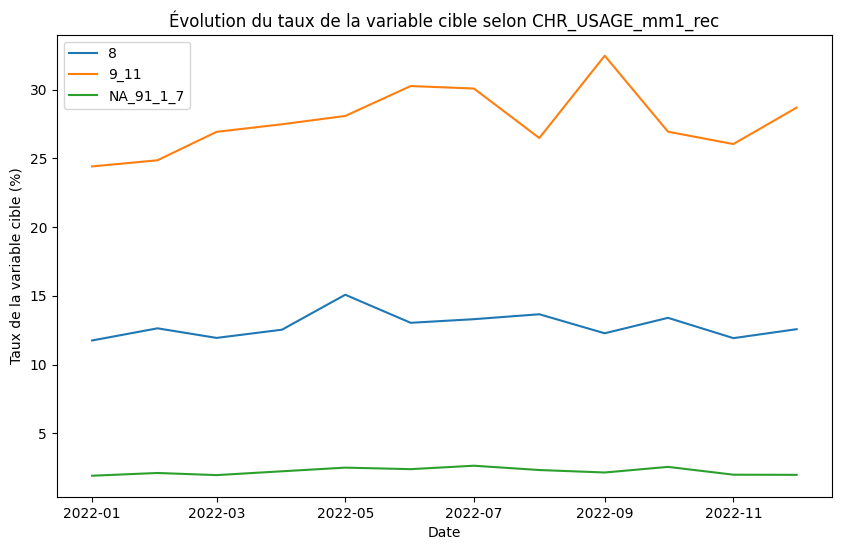

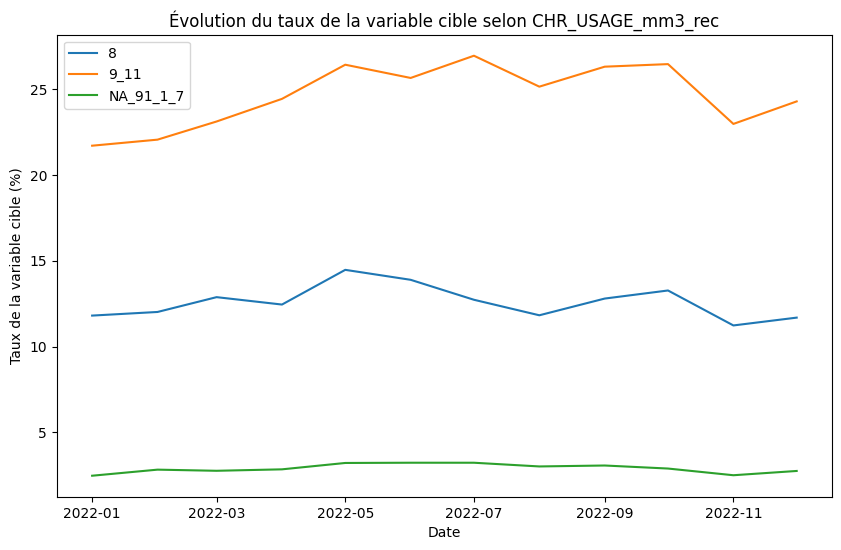

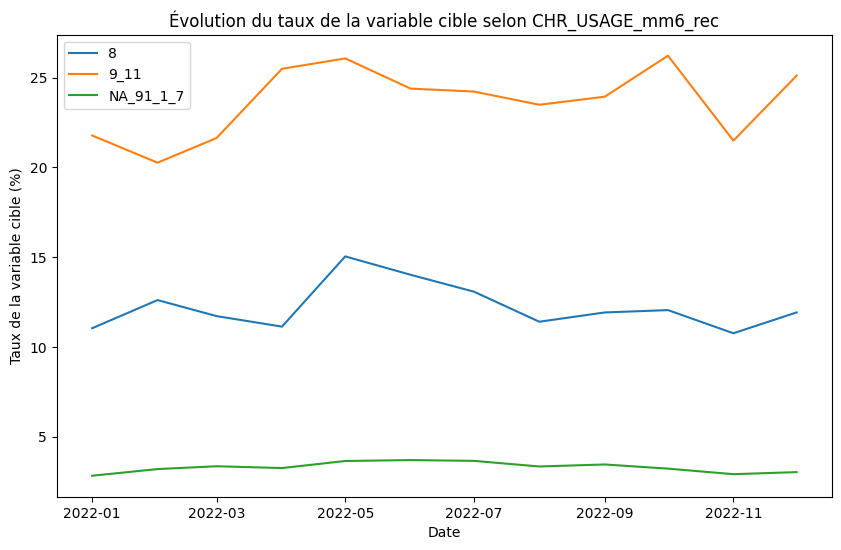

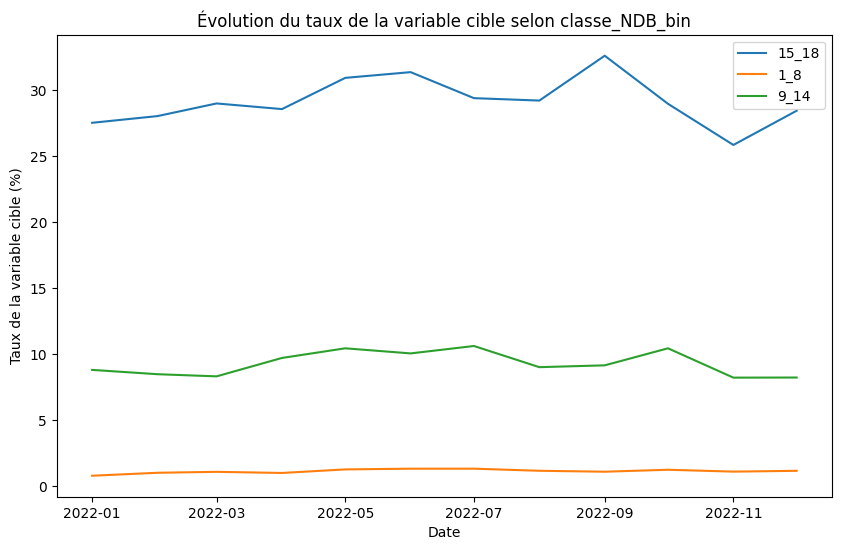

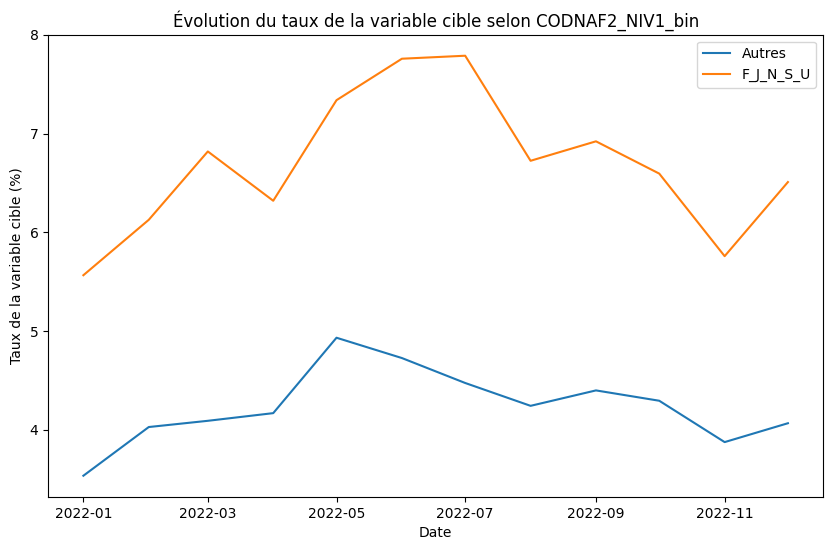

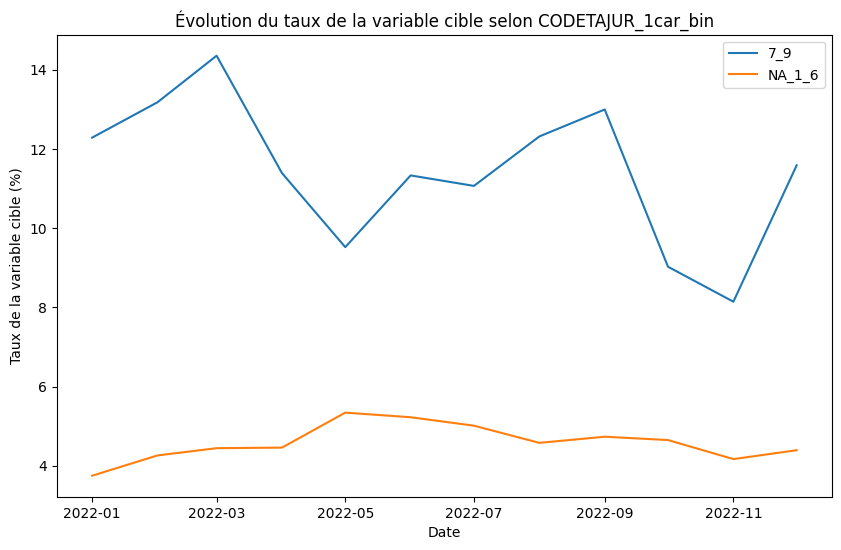

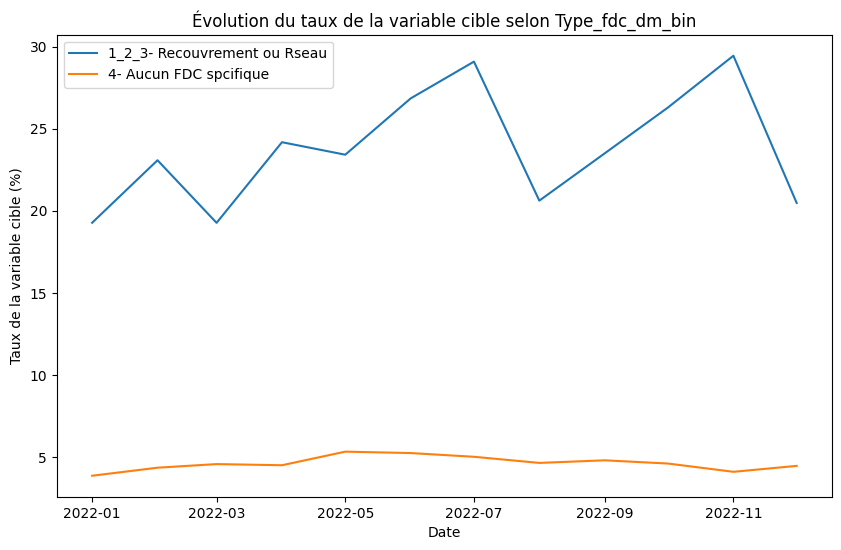

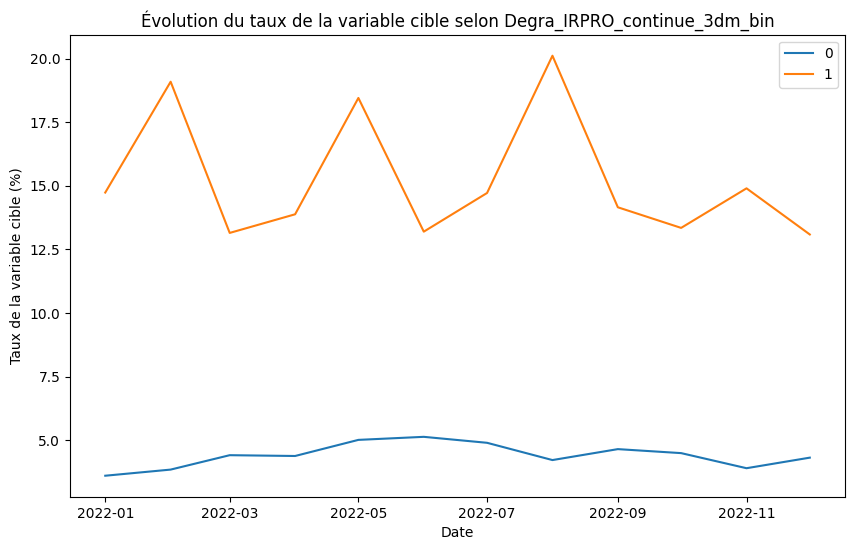

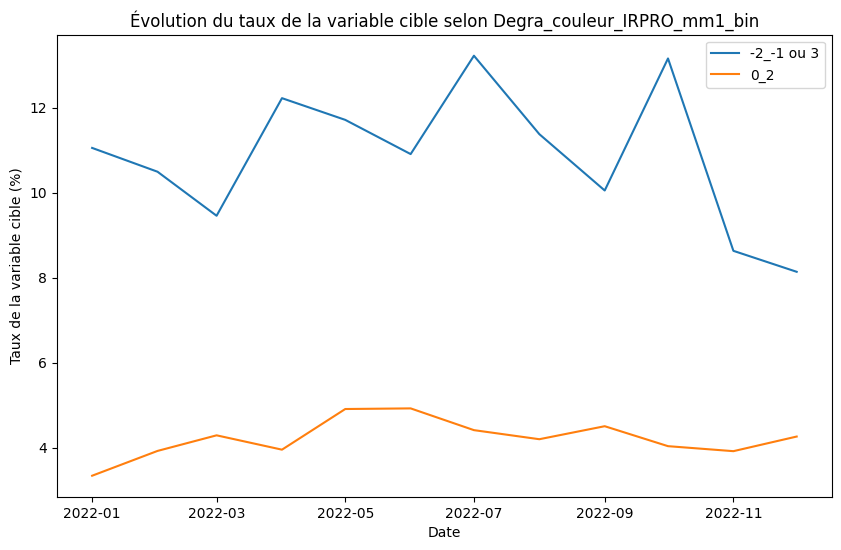

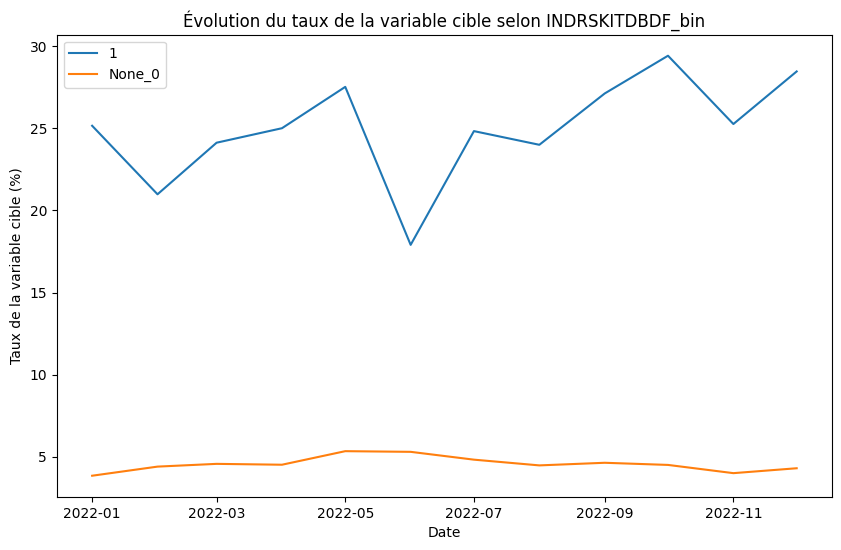

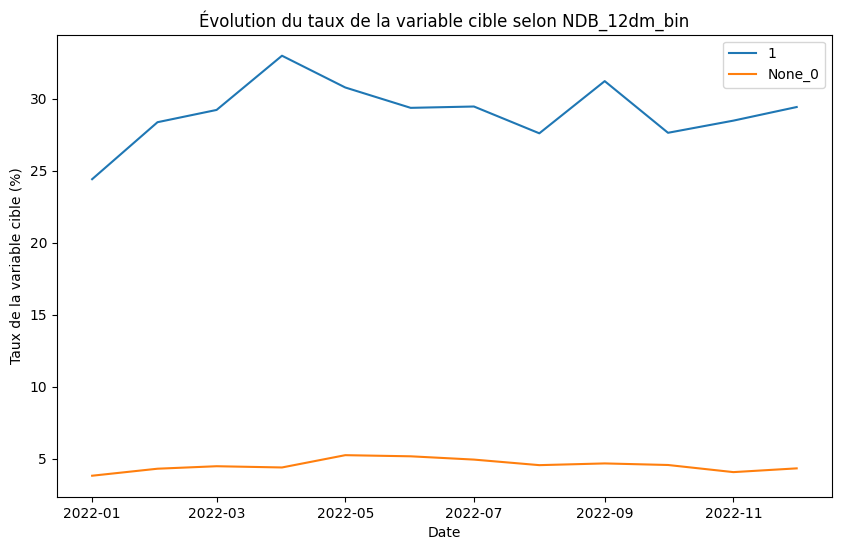

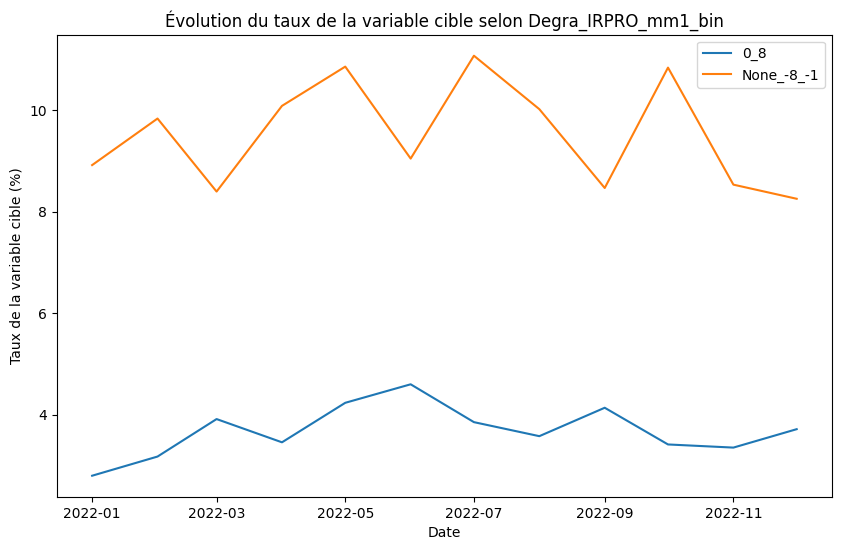

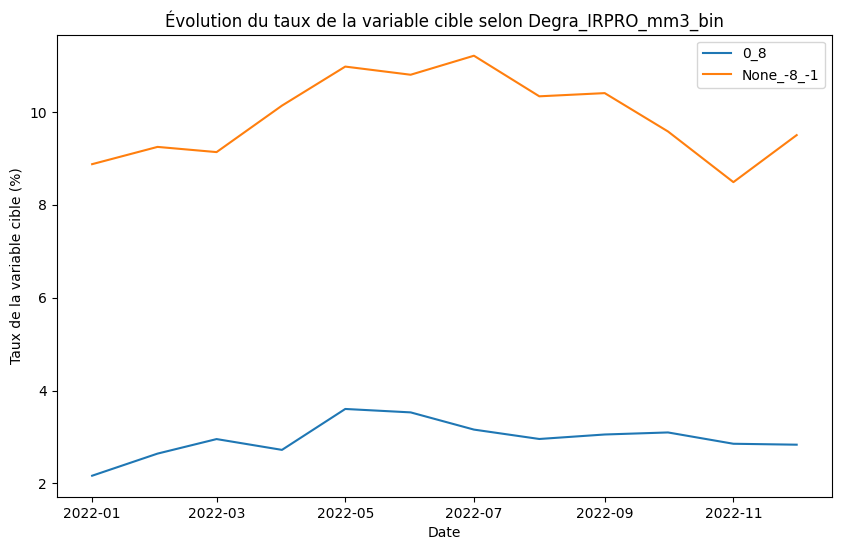

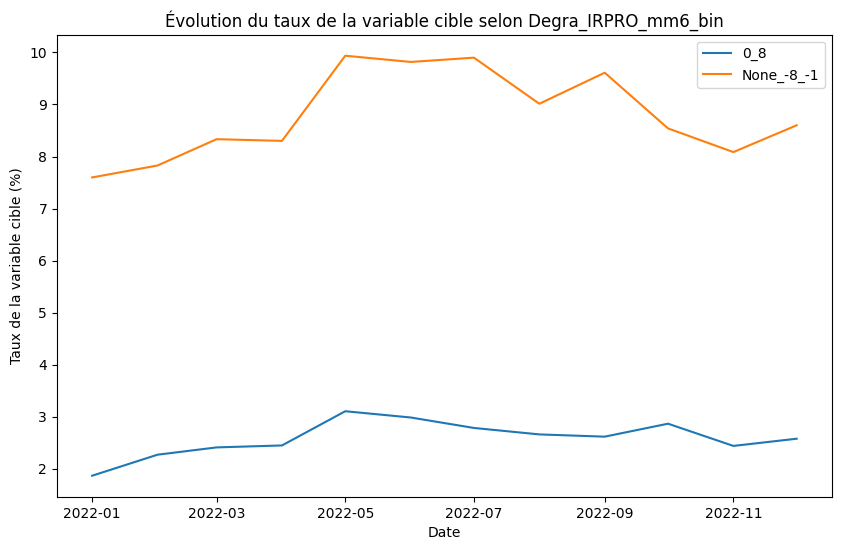

In [140]:
for colonne_dis in cat_rec_column:
    df_time_series = discret.groupby(['date', colonne_dis])['target_column'].mean().reset_index()
    
    # Pivote le DataFrame pour avoir les dates en index et les catégories en colonnes
    df_pivot = df_time_series.pivot(index='date', columns=colonne_dis, values='target_column')
    
    # Tracer l'évolution du taux de la variable cible dans le temps pour chaque catégorie
    plt.figure(figsize=(10, 6))
    for category in df_pivot.columns:
        plt.plot(df_pivot.index, df_pivot[category] * 100, label=category)
    
    plt.title(f'Évolution du taux de la variable cible selon {colonne_dis}')
    plt.xlabel('Date')
    plt.ylabel('Taux de la variable cible (%)')
    plt.legend()
    plt.show()

#### Validation des nouvelles variables

In [141]:
print(len(vars_cat_sel))
print(len(cat_rec_column))

15
14


In [142]:
print(len(discret_column))
print(len(vars_quan_sel))

11
11


In [143]:
print(len(discret_column))
print(len(vars_quan_sel))

11
11


In [144]:
discret_column

['DEPASSEMENT_dis',
 'NBJDEPDP_dis',
 'NBJDEB_NA_dis',
 'CRTOC_IND_0164_dis',
 'NB_MOIS_AVEC_ARR_12dm_dis',
 'NBJDEB_IND_0015_dis',
 'LIGCRE_IND_0009_dis',
 'NBJDEB_NA_mm3_dis',
 'NBJ_ARR_6dm_dis',
 'NBJ_ARR_12dm_dis',
 'DEPASSEMENT_6dm_dis']

In [145]:
cat_rec_column

['CHR_USAGE_mm1_rec',
 'CHR_USAGE_mm3_rec',
 'CHR_USAGE_mm6_rec',
 'classe_NDB_bin',
 'CODNAF2_NIV1_bin',
 'CODETAJUR_1car_bin',
 'Type_fdc_dm_bin',
 'Degra_IRPRO_continue_3dm_bin',
 'Degra_couleur_IRPRO_mm1_bin',
 'INDRSKITDBDF_bin',
 'NDB_12dm_bin',
 'Degra_IRPRO_mm1_bin',
 'Degra_IRPRO_mm3_bin',
 'Degra_IRPRO_mm6_bin']

In [146]:
new_variables = cat_rec_column + discret_column 
print(len(new_variables))

25


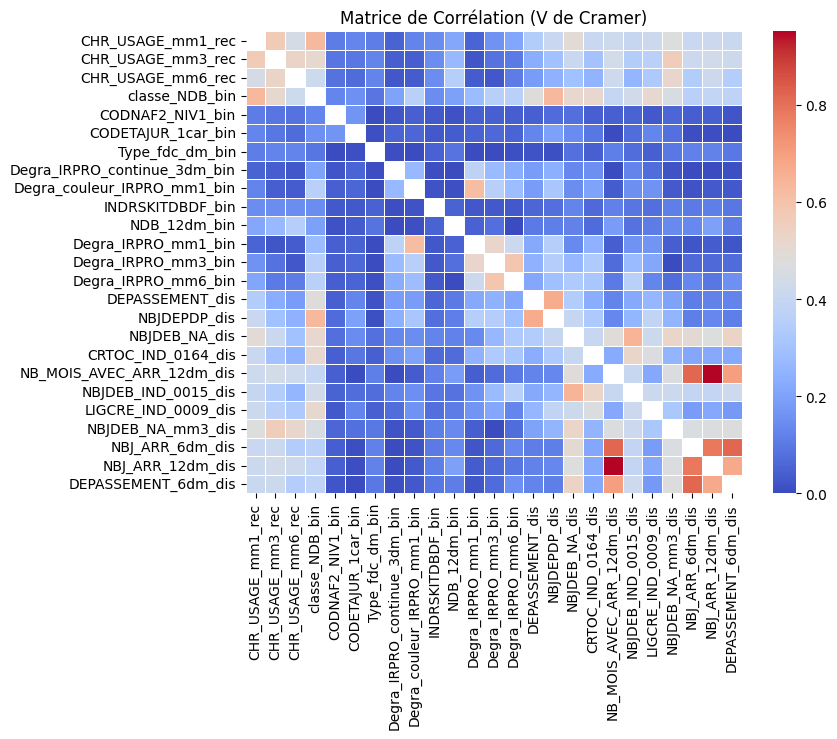

In [147]:
cat_df = discret[new_variables]


# Calculez la matrice de corrélation basée sur le V de Cramer
corr_matrix_cat = pd.DataFrame(index=cat_df.columns, columns=cat_df.columns, dtype=float)
for i in cat_df.columns:
    for j in cat_df.columns:
        if i != j:
            confusion_matrix_cat = pd.crosstab(cat_df[i], cat_df[j])
            corr_matrix_cat.loc[i, j] = cramers_v(confusion_matrix_cat)

# Créez une carte de chaleur (heatmap) basée sur le V de Cramer
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_cat, cmap='coolwarm', linewidths=.5)

# Ajoutez un titre
plt.title('Matrice de Corrélation (V de Cramer)')

# Affichez le graphique
plt.show()

In [148]:
seuil_corr = 0.7
variable_pairs_cat_inacceptable = []

for i in range(len(corr_matrix_cat.columns)):
    for j in range(i+1, len(corr_matrix_cat.columns)):
        if abs(corr_matrix_cat.iloc[i, j]) > seuil_corr:
            variable_pairs_cat_inacceptable.append((discret[new_variables].columns[i], discret[new_variables].columns[j]))
            
# Affichez les paires de variables corrélées
print("Paires de variables avec des corrélations inacceptables :")
for pair in variable_pairs_cat_inacceptable:
    print(pair)

Paires de variables avec des corrélations inacceptables :
('NB_MOIS_AVEC_ARR_12dm_dis', 'NBJ_ARR_6dm_dis')
('NB_MOIS_AVEC_ARR_12dm_dis', 'NBJ_ARR_12dm_dis')
('NB_MOIS_AVEC_ARR_12dm_dis', 'DEPASSEMENT_6dm_dis')
('NBJ_ARR_6dm_dis', 'NBJ_ARR_12dm_dis')
('NBJ_ARR_6dm_dis', 'DEPASSEMENT_6dm_dis')


In [149]:
vars_suppr_cat =[]

Chi2test = chi_squared_test(discret,target[target_column],new_variables).sort_values(by ='Chi2',ascending = False).round(3)

for pair in variable_pairs_cat_inacceptable:

    if float(Chi2test['V de Cramer'][Chi2test['Variable']==pair[0]]) < float(Chi2test['V de Cramer'][Chi2test['Variable']==pair[1]]):
        vars_suppr_cat.append(pair[0])
    else:
        vars_suppr_cat.append(pair[1])

vars_suppr_cat

['NBJ_ARR_6dm_dis',
 'NBJ_ARR_12dm_dis',
 'DEPASSEMENT_6dm_dis',
 'NBJ_ARR_6dm_dis',
 'DEPASSEMENT_6dm_dis']

In [150]:
new_variables_decorr = [var for var in new_variables if var not in vars_suppr_cat]
print(len(new_variables_decorr))

22


Text(0.5, 1.0, 'Variables catégorielles dépendantes de la variable cible')

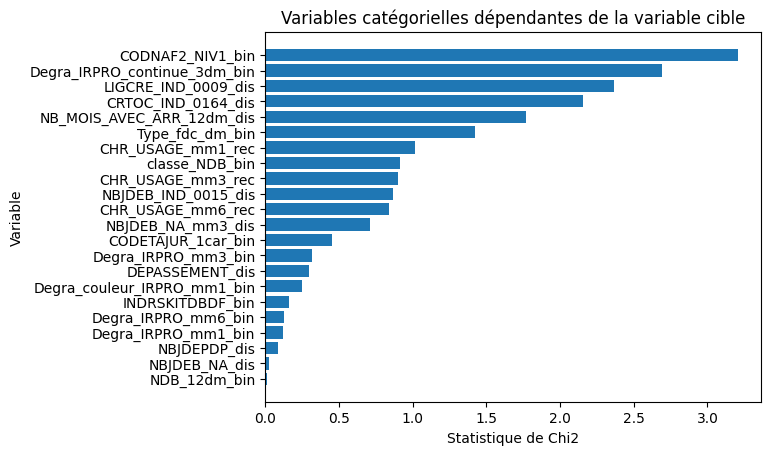

In [151]:
new_base_test_chi2= chi_squared_test(discret,target[target_column],new_variables_decorr).sort_values(by ='Chi2',ascending = True).round(3)
plt.barh(new_base_test_chi2['Variable'], new_base_test_chi2['Chi2'])

# Ajoutez des étiquettes et un titre
plt.xlabel('Statistique de Chi2')
plt.ylabel('Variable')
plt.title('Variables catégorielles dépendantes de la variable cible')

### Sélection des variables pour le modèle

In [ ]:
# On élimine certaines variables selon la logique métier
# il s'agit de ne garder une seule variable dérivée d'un même indicatur
variables_sel = ["CODNAF2_NIV1_bin", "Degra_IRPRO_continue_3dm_bin", "LIGCRE_IND_0009_dis", "CRTOC_IND_0164_dis",
                "NB_MOIS_AVEC_ARR_12dm_dis", "Type_fdc_dm_bin", "CHR_USAGE_mm1_rec", "classe_NDB_bin", "NBJDEB_IND_0015_dis",
                "NBJDEB_NA_mm3_dis", "CODETAJUR_1car_bin", "DEPASSEMENT_dis", "INDRSKITDBDF_bin", "NDB_12dm_bin"]


In [ ]:
discret['cible_1'] = base_travail['cible_1']
discret[variables_sel+["cible_1"]].to_csv('regression_logistique.csv', index=False)
discret_test[variables_sel+["cible_1"]].to_csv('regression_logistique_test.csv', index=False)


In [ ]:
discret[["CODNAF2", "CODNAF2_NIV1", "CODNAF2_NIV1_bin"]][discret["CODNAF2_NIV1"].isna()]

,CODNAF2,CODNAF2_NIV1,CODNAF2_NIV1_bin
41,0000Z,NaN,Autres
760,0000Z,NaN,Autres
860,0000Z,NaN,Autres
873,0000Z,NaN,Autres
1133,0000Z,NaN,Autres
...,...,...,...
595772,0000Z,NaN,Autres
595803,0000Z,NaN,Autres
595842,0000Z,NaN,Autres
595850,0000Z,NaN,Autres


In [ ]:
set(discret["CODNAF2_NIV1_bin"])

{'Autres', 'F_J_N_S'}

In [ ]:

test = ['NBJ_ARR_6dm','NBJDEB_NA_mm3','NBJ_ARR_12dm','DEPASSEMENT_3dm','DEPASSEMENT_6dm' ]

for col in test:
    discret['decile'] = pd.qcut(discret[col], 20, labels=None, duplicates='drop')
    
    df_grouped = discret.groupby('decile').agg(
        taux_risque=('target_column', lambda x: x.mean()*100),       # Calcul du taux de risque
        population=('target_column', 'size') 
    )
    
    # Calcul de la proportion de la population pour chaque décile
    df_grouped['proportion'] = df_grouped['population'] / df_grouped['population'].sum()*100
    
    # Afficher le DataFrame groupé avec les proportions
    print("________________________________________________________________________________________________")
    print(col)
    print("________________________________________________________________________________________________")
    print(df_grouped)

   

________________________________________________________________________________________________
NBJ_ARR_6dm
________________________________________________________________________________________________
               taux_risque  population  proportion
decile                                            
(-0.001, 7.0]     3.798157      568144   95.317378
(7.0, 1185.0]    23.954713       27911    4.682622
________________________________________________________________________________________________
NBJDEB_NA_mm3
________________________________________________________________________________________________
               taux_risque  population  proportion
decile                                            
(-2.001, 0.0]     2.654718      468449   78.591573
(0.0, 1.0]        5.224045       13591    2.280159
(1.0, 5.0]        6.798365       27639    4.636988
(5.0, 12.0]       9.386027       26923    4.516865
(12.0, 29.0]     14.011936       30160    5.059936
(29.0, 92.0]     22.14522

In [ ]:
base_travail[test].isna().sum()

NBJ_ARR_6dm        0
NBJDEB_NA_mm3      0
NBJ_ARR_12dm       0
DEPASSEMENT_3dm    0
DEPASSEMENT_6dm    0
dtype: int64

In [ ]:
# Supposons que base_travail est votre DataFrame
# 'target' est le nom de votre variable cible
# 'test' est la liste des noms de colonnes où vous voulez vérifier les valeurs manquantes

for col in test:
    # Lignes avec des valeurs manquantes dans la colonne actuelle
    missing = discret[discret[col].isna()]
    
    # Calcul du taux de risque (proportion où la variable cible est 1)
    taux_risque = missing['target_column'].mean()  # mean() sur une série binaire donne la proportion de 1
    
    # Affichage du taux de risque pour la colonne actuelle
    print(f"Taux de risque pour {col}: {taux_risque}")

Taux de risque pour NBJ_ARR_6dm: nan
Taux de risque pour NBJDEB_NA_mm3: nan
Taux de risque pour NBJ_ARR_12dm: nan
Taux de risque pour DEPASSEMENT_3dm: nan
Taux de risque pour DEPASSEMENT_6dm: nan


In [ ]:

base_travail[test].describe()

,NBJ_ARR_6dm,NBJDEB_NA_mm3,NBJ_ARR_12dm,DEPASSEMENT_3dm,DEPASSEMENT_6dm
count,596055.000000,596055.000000,596055.000000,596055.000000,596055.000000
mean,1.629631,4.242944,2.630076,194.656828,332.927846
std,12.699614,13.150717,17.408545,3354.930780,4453.446957
min,0.000000,-2.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1185.000000,92.000000,1185.000000,922783.240000,922783.240000


In [ ]:
"""
select_num_column = [col for col in vars_quan_sel if col not in variable_dis]

cat_rec_column=cat_rec_column+discret_column
cat_rec_column


SyntaxError: incomplete input (1805190640.py, line 1)

In [ ]:
#select_num_column

In [ ]:

# Calculez la matrice de corrélation
correlation_matrix_quan = base_reg[select_num_column].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size of the figure
sns.heatmap(correlation_matrix_quan, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
base_reg = discret[['cible_1','date']+variable_dis+cat_rec_column]
base_reg

In [ ]:
base_reg['cible_1'].astype(int).mean()*100

In [ ]:
from sklearn.model_selection import train_test_split

# Ajout d'une nouvelle colonne 'stratify_col' qui combine la variable cible et la date
# Supposons que 'target' est votre variable cible et 'date' est votre variable de date
#X['stratify_col'] = base_reg['cible_1'].astype(str) + '_' + base_reg['date'].astype(str)

X = base_reg[cat_rec_column]

for col in cat_rec_column:
    dummies = pd.get_dummies(X[col], prefix=col)
    X = pd.concat([X, dummies], axis=1)
    X.drop(col, axis=1, inplace=True)
    
y = base_reg['cible_1']
X['stratify_col'] = base_reg['cible_1'].astype(str) + '_' + base_reg['date'].astype(str)


# Split train-test stratifié en utilisant la colonne combinée
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Les features incluant la date si elle est utilisée comme feature
    y,                 # La variable cible
    stratify=X['stratify_col'],  # La nouvelle colonne pour la stratification
    test_size=0.3,                # La proportion de l'ensemble de test
    random_state=42               # La graine pour la reproductibilité
)

# Vous pouvez ensuite supprimer la colonne 'stratify_col' si elle n'est pas nécessaire pour l'entraînement
X_train = X_train.drop(['stratify_col'], axis=1)
X_test = X_test.drop(['stratify_col'], axis=1)


In [ ]:
y_train

In [ ]:
from sklearn.linear_model import LogisticRegression

# Préparation des données pour scikit-learn
# Pas besoin d'ajouter une colonne constante, scikit-learn le fait automatiquement

# Création du modèle de régression logistique avec scikit-learn
logistic_model = LogisticRegression()

# Ajustement du modèle
logistic_model.fit(X_train, y_train)

# Vous pouvez maintenant utiliser logistic_model pour prédire ou évaluer la performance


In [ ]:
predicted_target = logistic_model.predict(X_test)

In [ ]:
score = logistic_model.score(X_test, y_test)

In [ ]:
score

In [ ]:
# Obtenir les coefficients du modèle
coefficients = logistic_model.coef_[0]

# Créer un DataFrame pour une meilleure lisibilité
feature_names = X_train.columns
coefs_with_features = pd.DataFrame(list(zip(feature_names, coefficients)), columns=['Feature', 'Coefficient'])

# Trier les caractéristiques par l'importance du coefficient (absolu)
coefs_with_features['abs'] = coefs_with_features['Coefficient'].abs()
coefs_with_features = coefs_with_features.sort_values(by='abs', ascending=False).drop('abs', axis=1)

print(coefs_with_features)


In [ ]:
import statsmodels.api as sm


X_train = X_train.astype(int)

y_train = y_train.astype('int')


# Ajouter une colonne constante pour le terme d'interception
X_train_sm = sm.add_constant(X_train)

# Créer et ajuster le modèle de régression logistique avec statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Afficher le résumé qui inclut les p-values
print(result.summary())


In [ ]:
X_train.select_dtypes(include="object").columns
y_train.select_dtypes(include="object").columns

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot


# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
    
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
    
# feature selection

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [ ]:
##### 
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
B, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
X_train